#**Mounting**

In [1]:
import os                                     
import google.colab                           
                                   
# mounting Google Drive in the runtime's virtual machine

if not os.path.isdir('/content/drive'):

    google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# # root directory of the project

# root_directory = '/content/drive/MyDrive/Research 2021/G3 Md junayed Hossain_1821900_Jannatul Ferdaus_1821844_Saifur Rahman_ 1821450/Bone Marrow Transplant'

# # changing to root directory of the project

# os.chdir(root_directory)

In [3]:
!ls

drive  sample_data


#**Installations & Imports**

**Standard Imports**

In [4]:
import sys

import requests

import datetime

**Other Imports**

In [5]:
modules = {'numpy': False, 'pandas': False, 
           'matplotlib': False, 'seaborn': False, 'missingno': False,
           'statsmodels.api': False, 'missingpy': False}


In [6]:
!pip install chord
!pip install missingno
!pip install missingpy
!pip install soccerplots #for radar chart
!pip install mplsoccer #for radar chart



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 3.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.8 MB/s 


In [7]:
# import missingno as msno
# import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import validation_curve
from soccerplots.radar_chart import Radar

import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

# import missingpy

from missingpy import MissForest

In [8]:
while True:

  try:

    import numpy as np

    modules['numpy'] = True

    import pandas as pd

    modules['pandas'] = True

    from matplotlib import pyplot as plt

    modules['matplotlib'] = True

    import seaborn as sns

    modules['seaborn'] = True

    import missingno as msno

    modules['missingno'] = True

    import statsmodels.api as sm

    modules['statsmodels.api'] = True

    import missingpy

    modules['missingpy'] = True

    print('Successfully Imported!!')

    break

  except:

    if modules['numpy'] == False: 

      print('Installing numpy')
      
      !pip install numpy

      continue

    if modules['pandas'] == False:

      print('Installing pandas')

      !pip install pandas

      continue
     
    if modules['matplotlib'] == False:

      print('Installing matplotlib')      

      !pip install matplotlib
      continue

    if modules['seaborn'] == False:

      print('Installing seaborn')

      !pip install seaborn
      continue

    if modules['missingno'] == False:

      print('Installing missingno')
      !pip install missingno
      continue
    
    if modules['statsmodels.api'] == False:

      print('Installing statsmodels.api')
      !pip install statsmodels.api
      continue
        
    if modules['missingpy'] == False:

      print('Installing missingpy')
      !pip install missingpy
      continue


    print('Packages Installed Successfully')



#installation & imports

 
 

plt.style.use('fivethirtyeight')

Successfully Imported!!


In [9]:
## Import necessary libraries 

from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.style as style
from sklearn.metrics import confusion_matrix
from sklearn import tree , metrics, preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn import preprocessing
 

## Machine Learning Models

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

#**Initializations**

In [11]:
#input_directory = '/content/drive/MyDrive/G3 Md junayed Hossain_1821900_Jannatul Ferdaus_1821844_Saifur Rahman_ 1821450/Bone Marrow Transplant/input_directory'
#input_directory = '/content/drive/MyDrive/Research 2021/G3 Md junayed Hossain_1821900_Jannatul Ferdaus_1821844_Saifur Rahman_ 1821450/Bone Marrow Transplant/input_directory'

input_directory = '/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory'

#**Dataset Downloading & Extraction**

In [12]:
dataset_name = 'Bone marrow transplant: children Data Set' 

dataset_filename = 'bone_marrow_transplant.arff'

dataset_download_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00565/bone-marrow.arff'

dataset_donated_date = datetime.date(2020, 4, 21)

In [13]:
def download_dataset(output_directory, dataset_name, dataset_filename, dataset_download_url):
  
  if not os.path.exists(os.path.join(output_directory, dataset_filename)):

    response = requests.get(dataset_download_url, allow_redirects=True)

    with open(os.path.join(output_directory, dataset_filename), 'wb') as file:
      
      file.write(response.content)

    print('{0} Downloaded'.format(dataset_name))

  else:
    
    print('{0} Already Exists'.format(dataset_name,))

In [14]:
download_dataset(input_directory,dataset_name, dataset_filename, dataset_download_url)

Bone marrow transplant: children Data Set Already Exists


In [15]:
input_file = open(os.path.join(input_directory, dataset_filename), "r")

In [16]:
header_list = ["recipient_gender", "stem_cell_source","donor_age", "donor_age_below_35","acute_GvHD_II_III_IV",
               "gender_match", "donor_ABO", "recipient_ABO", "recipient_rh", "ABO_match", "CMV_status",
               "donor_CMV", "recipient_CMV", "disease", "risk_group", "tx_post_relapse", "disease_group", "HLA_match",
               "HLA_mismatch", "antigen",	"allel", "HLA_group_1","recipient_age","recipient_age_below_10",
               "recipient_age_int", "relapse","acute_GvHD_III_IV","extensive_chronic_GvHD", "CD34_x1e6_per_kg",
               "CD3_to_CD34_ratio","CD3_x1e8_per_kg", "recipient_body_mass", "ANC_recovery", "PLT_recovery",
               "time_to_acute_GvHD_III_IV","survival_time",	"survival_status"]

In [17]:
data_df = pd.read_csv(os.path.join(input_directory, dataset_filename), skiprows=108, names = header_list)

In [18]:
data_df

,recipient_gender,stem_cell_source,donor_age,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,donor_ABO,recipient_ABO,recipient_rh,ABO_match,...,extensive_chronic_GvHD,CD34_x1e6_per_kg,CD3_to_CD34_ratio,CD3_x1e8_per_kg,recipient_body_mass,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1,1,0,...,1,7.20,1.33876,5.38,35,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1,1,0,...,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1,1,0,...,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2,1,1,...,?,4.25,29.481647,0.14,50,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2,0,1,...,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37.575342,1,1,0,1,1,0,0,...,1,11.08,2.52275,4.39,44,15,22,16,385,1
183,0,1,22.895890,0,0,0,1,0,1,1,...,1,4.64,1.038858,4.47,44.5,12,30,1000000,634,1
184,0,1,27.347945,0,1,0,1,-1,1,1,...,1,7.73,1.635559,4.73,33,16,16,1000000,1895,0
185,1,1,27.780822,0,1,0,1,0,1,1,...,0,15.41,8.07777,1.91,24,13,14,54,382,1


In [19]:
data_df.replace({ 'donor_ABO':{-1:np.nan},
                  'recipient_ABO':{'-1':np.nan},
                  'recipient_rh':{"?":np.nan},
                  'ABO_match':{"?":np.nan},
                  'CMV_status':{"?":np.nan},
                  'donor_CMV':{"?":np.nan},
                  'recipient_CMV':{"?":np.nan},
                  'antigen':{"?":np.nan},
                  'allel':{"?":np.nan},
                  'extensive_chronic_GvHD':{"?":np.nan},
                  'CD3_to_CD34_ratio':{"?":np.nan},
                  'CD3_x1e8_per_kg':{"?":np.nan},
                  'recipient_body_mass':{"?":np.nan},
                  'ANC_recovery':{1000000:np.nan},
                  'PLT_recovery':{1000000:np.nan},
                  'time_to_acute_GvHD_III_IV':{1000000:np.nan}
                  },inplace = True)

data_df['recipient_ABO'] = data_df['recipient_ABO'].replace(['?'], np.nan)
data_df['allel'] = data_df['allel'].replace(['-1'], np.nan)
data_df['antigen'] = data_df['antigen'].replace(['-1'], np.nan)

In [20]:
# test_data = data_df[~data_df.isnull().any(axis=1)]
# test_data

In [21]:
# train_data_df = data_df[data_df.isnull().any(axis=1)]
# train_data_df

#**Dataset Loading**

In [22]:
#data_df = pd.read_csv(os.path.join(input_directory, dataset_filename))

In [23]:
data_df.head()

,recipient_gender,stem_cell_source,donor_age,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,donor_ABO,recipient_ABO,recipient_rh,ABO_match,...,extensive_chronic_GvHD,CD34_x1e6_per_kg,CD3_to_CD34_ratio,CD3_x1e8_per_kg,recipient_body_mass,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1.0,1,1,0,...,1,7.20,1.33876,5.38,35,19.0,51.0,32.0,999,0
1,1,0,23.342466,0,1,0,NaN,NaN,1,0,...,1,4.50,11.078295,0.41,20.6,16.0,37.0,NaN,163,1
2,1,0,26.394521,0,1,0,NaN,NaN,1,0,...,1,7.94,19.01323,0.42,23.4,23.0,20.0,NaN,435,1
3,0,0,39.684932,1,1,0,1.0,2,1,1,...,NaN,4.25,29.481647,0.14,50,23.0,29.0,19.0,53,1
4,0,1,33.358904,0,0,0,1.0,2,0,1,...,1,51.85,3.972255,13.05,9,14.0,14.0,NaN,2043,0


In [24]:
data_df.shape

(187, 37)

#**Exploratory Data Analysis**


**Dataset Information**

In [25]:
data_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   recipient_gender           187 non-null    int64  
 1   stem_cell_source           187 non-null    int64  
 2   donor_age                  187 non-null    float64
 3   donor_age_below_35         187 non-null    int64  
 4   acute_GvHD_II_III_IV       187 non-null    int64  
 5   gender_match               187 non-null    int64  
 6   donor_ABO                  159 non-null    float64
 7   recipient_ABO              136 non-null    object 
 8   recipient_rh               185 non-null    object 
 9   ABO_match                  186 non-null    object 
 10  CMV_status                 171 non-null    object 
 11  donor_CMV                  185 non-null    object 
 12  recipient_CMV              173 non-null    object 
 13  disease                    187 non-null    object 

In [26]:
data_df.describe()

,recipient_gender,stem_cell_source,donor_age,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,donor_ABO,risk_group,tx_post_relapse,disease_group,...,recipient_age_below_10,recipient_age_int,relapse,acute_GvHD_III_IV,CD34_x1e6_per_kg,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,159.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,182.000000,170.000000,42.000000,187.000000,187.000000
mean,0.598930,0.775401,33.472068,0.443850,0.598930,0.171123,0.635220,0.368984,0.122995,0.828877,...,0.470588,1.224599,0.149733,0.786096,11.891781,15.307692,31.711765,31.047619,938.743316,0.454545
std,0.491431,0.418438,8.271826,0.498171,0.491431,0.377627,0.650427,0.483825,0.329313,0.377627,...,0.500474,0.824904,0.357767,0.411161,9.914386,3.010818,37.009744,23.777374,849.589495,0.499266
min,0.000000,0.000000,18.646575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.790000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,0.000000,1.000000,27.039726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.500000,0.000000,1.000000,5.350000,13.000000,15.000000,16.250000,168.500000,0.000000
50%,1.000000,1.000000,33.550685,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,9.720000,15.000000,21.000000,21.000000,676.000000,0.000000
75%,1.000000,1.000000,40.117809,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,15.415000,17.000000,29.750000,35.500000,1604.000000,1.000000
max,1.000000,1.000000,55.553425,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,57.780000,26.000000,285.000000,100.000000,3364.000000,1.000000


**Dataset Preview**

In [27]:
data_df.head(10)

,recipient_gender,stem_cell_source,donor_age,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,donor_ABO,recipient_ABO,recipient_rh,ABO_match,...,extensive_chronic_GvHD,CD34_x1e6_per_kg,CD3_to_CD34_ratio,CD3_x1e8_per_kg,recipient_body_mass,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1.0,1,1,0,...,1,7.20,1.33876,5.38,35,19.0,51.0,32.0,999,0
1,1,0,23.342466,0,1,0,NaN,NaN,1,0,...,1,4.50,11.078295,0.41,20.6,16.0,37.0,NaN,163,1
2,1,0,26.394521,0,1,0,NaN,NaN,1,0,...,1,7.94,19.01323,0.42,23.4,23.0,20.0,NaN,435,1
3,0,0,39.684932,1,1,0,1.0,2,1,1,...,NaN,4.25,29.481647,0.14,50,23.0,29.0,19.0,53,1
4,0,1,33.358904,0,0,0,1.0,2,0,1,...,1,51.85,3.972255,13.05,9,14.0,14.0,NaN,2043,0
5,1,0,27.391781,0,0,0,2.0,0,1,1,...,1,3.27,8.412758,0.39,40,16.0,70.0,NaN,2800,0
6,0,1,34.520548,0,1,0,0.0,1,0,1,...,NaN,17.78,2.406248,7.39,51,17.0,29.0,18.0,41,1
7,1,0,21.435616,0,1,0,0.0,1,1,1,...,NaN,6.41,NaN,NaN,56,22.0,58.0,22.0,45,1
8,1,1,32.641096,0,0,0,2.0,0,1,1,...,1,23.54,3.772555,6.24,20.5,15.0,14.0,NaN,671,0
9,1,1,28.783562,0,1,1,1.0,0,1,1,...,1,7.69,1.035244,7.43,16.5,16.0,17.0,NaN,676,0


In [28]:
data_df.tail(10)

,recipient_gender,stem_cell_source,donor_age,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,donor_ABO,recipient_ABO,recipient_rh,ABO_match,...,extensive_chronic_GvHD,CD34_x1e6_per_kg,CD3_to_CD34_ratio,CD3_x1e8_per_kg,recipient_body_mass,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,survival_status
177,0,1,34.167123,0,1,0,0.0,NaN,1,1,...,1,11.45,1.671314,6.85,49,13.0,14.0,NaN,1985,0
178,1,1,37.060274,1,1,0,1.0,1,0,0,...,1,14.43,2.205359,6.54,24,12.0,19.0,NaN,1873,0
179,1,0,30.024658,0,1,1,1.0,2,0,1,...,1,8.11,16.32616,0.5,28,16.0,100.0,NaN,1627,0
180,1,1,30.854795,0,1,1,1.0,NaN,1,1,...,NaN,7.87,1.007599,7.81,25,13.0,23.0,NaN,41,1
181,1,1,37.632877,1,0,0,0.0,1,1,1,...,NaN,12.58,2.426122,5.19,33,NaN,NaN,NaN,6,1
182,1,1,37.575342,1,1,0,1.0,1,0,0,...,1,11.08,2.52275,4.39,44,15.0,22.0,16.0,385,1
183,0,1,22.895890,0,0,0,1.0,0,1,1,...,1,4.64,1.038858,4.47,44.5,12.0,30.0,NaN,634,1
184,0,1,27.347945,0,1,0,1.0,NaN,1,1,...,1,7.73,1.635559,4.73,33,16.0,16.0,NaN,1895,0
185,1,1,27.780822,0,1,0,1.0,0,1,1,...,0,15.41,8.07777,1.91,24,13.0,14.0,54.0,382,1
186,1,1,55.553425,1,1,0,1.0,2,1,1,...,1,9.91,0.948135,10.45,37,18.0,20.0,NaN,1109,0


**Initial Feature List**

In [29]:
print('Number of Total Columns: {0}'.format(len(data_df.columns)))

data_df.columns

Number of Total Columns: 37


Index(['recipient_gender', 'stem_cell_source', 'donor_age',
       'donor_age_below_35', 'acute_GvHD_II_III_IV', 'gender_match',
       'donor_ABO', 'recipient_ABO', 'recipient_rh', 'ABO_match', 'CMV_status',
       'donor_CMV', 'recipient_CMV', 'disease', 'risk_group',
       'tx_post_relapse', 'disease_group', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'recipient_age',
       'recipient_age_below_10', 'recipient_age_int', 'relapse',
       'acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'CD34_x1e6_per_kg',
       'CD3_to_CD34_ratio', 'CD3_x1e8_per_kg', 'recipient_body_mass',
       'ANC_recovery', 'PLT_recovery', 'time_to_acute_GvHD_III_IV',
       'survival_time', 'survival_status'],
      dtype='object')

**Drop Irrelevant Features: id**

In [30]:
# patient_id = data_df['id']

# data_df = data_df.drop('id',axis=1)

**Feature List After Feature Drop**

In [31]:
print('Number of Total Columns: {0}'.format(len(data_df.columns)))

data_df.columns

Number of Total Columns: 37


Index(['recipient_gender', 'stem_cell_source', 'donor_age',
       'donor_age_below_35', 'acute_GvHD_II_III_IV', 'gender_match',
       'donor_ABO', 'recipient_ABO', 'recipient_rh', 'ABO_match', 'CMV_status',
       'donor_CMV', 'recipient_CMV', 'disease', 'risk_group',
       'tx_post_relapse', 'disease_group', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'recipient_age',
       'recipient_age_below_10', 'recipient_age_int', 'relapse',
       'acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'CD34_x1e6_per_kg',
       'CD3_to_CD34_ratio', 'CD3_x1e8_per_kg', 'recipient_body_mass',
       'ANC_recovery', 'PLT_recovery', 'time_to_acute_GvHD_III_IV',
       'survival_time', 'survival_status'],
      dtype='object')

**Number of Missing Values & Percentage**

In [32]:
missing_value_count =  data_df.isnull().sum()

missing_value_percentage =  data_df.isnull().mean()*100 

missing_value_count_percentage_df = pd.concat([missing_value_count, missing_value_percentage], axis = 1, keys = ['Count', 'Percentage'])

missing_value_count_percentage_df = missing_value_count_percentage_df.sort_values(by = ['Count'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  
  print(missing_value_count_percentage_df)

                           Count  Percentage
recipient_gender               0    0.000000
CD34_x1e6_per_kg               0    0.000000
acute_GvHD_III_IV              0    0.000000
relapse                        0    0.000000
recipient_age_int              0    0.000000
recipient_age_below_10         0    0.000000
recipient_age                  0    0.000000
HLA_group_1                    0    0.000000
survival_time                  0    0.000000
HLA_match                      0    0.000000
disease_group                  0    0.000000
tx_post_relapse                0    0.000000
risk_group                     0    0.000000
HLA_mismatch                   0    0.000000
donor_age_below_35             0    0.000000
stem_cell_source               0    0.000000
donor_age                      0    0.000000
disease                        0    0.000000
acute_GvHD_II_III_IV           0    0.000000
gender_match                   0    0.000000
survival_status                0    0.000000
ABO_match 

**Checking for Duplicate Rows**

In [33]:
data_df.duplicated().sum()

0

**Checking for Unique Values**

In [34]:
data_df.nunique()

recipient_gender               2
stem_cell_source               2
donor_age                    187
donor_age_below_35             2
acute_GvHD_II_III_IV           2
gender_match                   2
donor_ABO                      3
recipient_ABO                  3
recipient_rh                   2
ABO_match                      2
CMV_status                     4
donor_CMV                      2
recipient_CMV                  2
disease                        5
risk_group                     2
tx_post_relapse                2
disease_group                  2
HLA_match                      4
HLA_mismatch                   2
antigen                        3
allel                          4
HLA_group_1                    7
recipient_age                125
recipient_age_below_10         2
recipient_age_int              3
relapse                        2
acute_GvHD_III_IV              2
extensive_chronic_GvHD         2
CD34_x1e6_per_kg             183
CD3_to_CD34_ratio            182
CD3_x1e8_p

In [35]:
for column in data_df.columns:

  print('----------------------------------------------------------------------')

  print('Unique Values of {0}'.format(column))

  print('----------------------------------------------------------------------')

  print(data_df[column].unique())

----------------------------------------------------------------------
Unique Values of recipient_gender
----------------------------------------------------------------------
[1 0]
----------------------------------------------------------------------
Unique Values of stem_cell_source
----------------------------------------------------------------------
[1 0]
----------------------------------------------------------------------
Unique Values of donor_age
----------------------------------------------------------------------
[22.830137 23.342466 26.394521 39.684932 33.358904 27.391781 34.520548
 21.435616 32.641096 28.783562 29.731507 36.8      40.863014 30.60274
 30.676712 41.164384 40.232877 40.821918 43.375342 31.745205 43.578082
 42.380822 31.545205 24.780822 30.50411  20.605479 40.969863 39.983562
 33.052055 39.172603 24.731507 24.353425 39.024658 23.446575 39.380822
 20.961644 49.860274 43.517808 40.536986 21.4      34.273973 20.471233
 44.380822 20.358904 31.526027 38.761644 2

**Evaluate and Modify Datatypes**

In [36]:
data_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   recipient_gender           187 non-null    int64  
 1   stem_cell_source           187 non-null    int64  
 2   donor_age                  187 non-null    float64
 3   donor_age_below_35         187 non-null    int64  
 4   acute_GvHD_II_III_IV       187 non-null    int64  
 5   gender_match               187 non-null    int64  
 6   donor_ABO                  159 non-null    float64
 7   recipient_ABO              136 non-null    object 
 8   recipient_rh               185 non-null    object 
 9   ABO_match                  186 non-null    object 
 10  CMV_status                 171 non-null    object 
 11  donor_CMV                  185 non-null    object 
 12  recipient_CMV              173 non-null    object 
 13  disease                    187 non-null    object 

In [37]:
selected_columns = ['recipient_gender', 'stem_cell_source', 'donor_age_below_35', 'acute_GvHD_II_III_IV', 'gender_match', 
                    'donor_ABO' ,'recipient_ABO', 'recipient_rh', 'ABO_match', 'CMV_status', 'donor_CMV', 'recipient_CMV', 'disease', 
                    'risk_group', 'tx_post_relapse', 'disease_group', 'HLA_match', 'HLA_mismatch', 'antigen', 'allel', 'HLA_group_1', 
                    'recipient_age_below_10', 'recipient_age_int', 'relapse', 'acute_GvHD_III_IV', 
                    'extensive_chronic_GvHD', 'survival_status']

for column in selected_columns:
  
  data_df[column] = data_df[column].astype('category')

In [38]:
data_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   recipient_gender           187 non-null    category
 1   stem_cell_source           187 non-null    category
 2   donor_age                  187 non-null    float64 
 3   donor_age_below_35         187 non-null    category
 4   acute_GvHD_II_III_IV       187 non-null    category
 5   gender_match               187 non-null    category
 6   donor_ABO                  159 non-null    category
 7   recipient_ABO              136 non-null    category
 8   recipient_rh               185 non-null    category
 9   ABO_match                  186 non-null    category
 10  CMV_status                 171 non-null    category
 11  donor_CMV                  185 non-null    category
 12  recipient_CMV              173 non-null    category
 13  disease                    187 non-

**Numerical Features**

In [39]:
numerical_features = [feature for feature in data_df.columns if data_df[feature].dtypes != 'category']

print('Number of Numerical Features: {0}'.format(len(numerical_features)))

print(numerical_features)

Number of Numerical Features: 10
['donor_age', 'recipient_age', 'CD34_x1e6_per_kg', 'CD3_to_CD34_ratio', 'CD3_x1e8_per_kg', 'recipient_body_mass', 'ANC_recovery', 'PLT_recovery', 'time_to_acute_GvHD_III_IV', 'survival_time']


In [40]:
for column in numerical_features:
    data_df[column] = data_df[column].astype('float')

In [41]:
numerical_features_df = data_df[numerical_features]

In [42]:
numerical_features_df

,donor_age,recipient_age,CD34_x1e6_per_kg,CD3_to_CD34_ratio,CD3_x1e8_per_kg,recipient_body_mass,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time
0,22.830137,9.6,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0
1,23.342466,4.0,4.50,11.078295,0.41,20.6,16.0,37.0,NaN,163.0
2,26.394521,6.6,7.94,19.013230,0.42,23.4,23.0,20.0,NaN,435.0
3,39.684932,18.1,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0
4,33.358904,1.3,51.85,3.972255,13.05,9.0,14.0,14.0,NaN,2043.0
...,...,...,...,...,...,...,...,...,...,...
182,37.575342,12.9,11.08,2.522750,4.39,44.0,15.0,22.0,16.0,385.0
183,22.895890,13.9,4.64,1.038858,4.47,44.5,12.0,30.0,NaN,634.0
184,27.347945,10.4,7.73,1.635559,4.73,33.0,16.0,16.0,NaN,1895.0
185,27.780822,8.0,15.41,8.077770,1.91,24.0,13.0,14.0,54.0,382.0


**Visualization of Numerica Features**

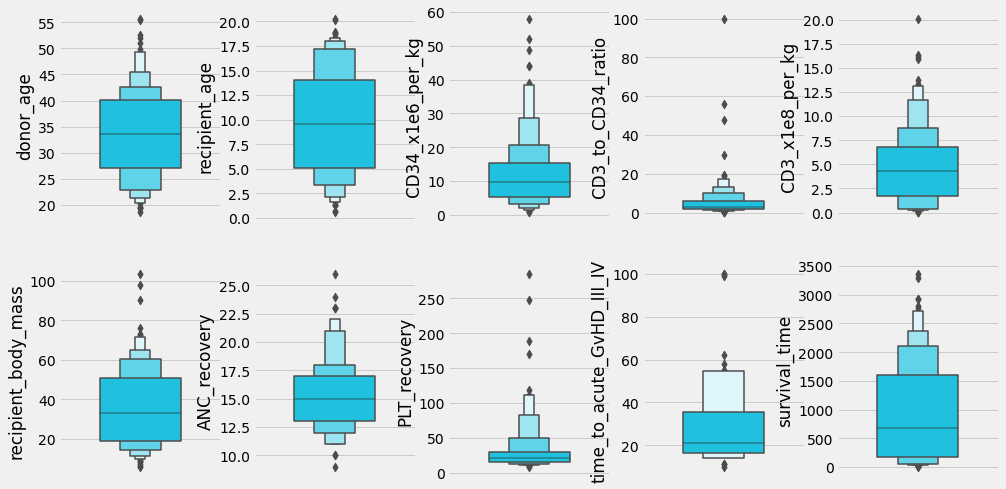

In [43]:
figure_width = 15

figure_height = 8

rows = 2

cols = 5

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(figure_width, figure_height))

# font settings
font = {'size': 15}

plt.rc('font', **font)

#plt.title('Box Plot: Numerical Features')

sns.set_theme(style="whitegrid")
sns.set(style="darkgrid")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
counter = 0

for i in range(rows):

  for j in range(cols):
    

    bplot = sns.boxenplot(ax=axes[i, j],
                        y = numerical_features[counter],
                        data=numerical_features_df, 
                        width=0.5,
                        dodge=False,
                        #palette="Blues_r",
                        color='#00D7FF'
                        
                        )
    
    counter = counter + 1

plt.savefig('/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory/images/numerical_data.svg',
            bbox_inches='tight',
            transparent=True)
plt.show()
plt.tight_layout()
plt.close() 


In [44]:
plt.savefig('/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory/p.png')
plt.show() 
plt.close()

<Figure size 432x288 with 0 Axes>

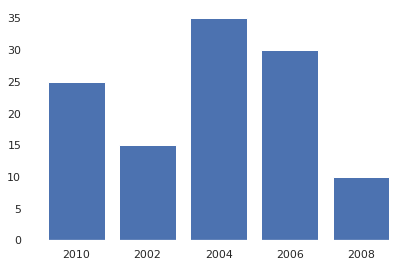

In [45]:

import matplotlib.pyplot as plt
 
# Creating data
year = ['2010', '2002', '2004', '2006', '2008']
production = [25, 15, 35, 30, 10]
 
# Plotting barchart
plt.bar(year, production)
 
# Saving the figure.
plt.savefig("output.svg")

**Categorical Features**

In [46]:
categorical_features = [feature for feature in data_df.columns if data_df[feature].dtypes == 'category']

print('Number of Categorical Features: {0}'.format(len(categorical_features)))

print(categorical_features)

Number of Categorical Features: 27
['recipient_gender', 'stem_cell_source', 'donor_age_below_35', 'acute_GvHD_II_III_IV', 'gender_match', 'donor_ABO', 'recipient_ABO', 'recipient_rh', 'ABO_match', 'CMV_status', 'donor_CMV', 'recipient_CMV', 'disease', 'risk_group', 'tx_post_relapse', 'disease_group', 'HLA_match', 'HLA_mismatch', 'antigen', 'allel', 'HLA_group_1', 'recipient_age_below_10', 'recipient_age_int', 'relapse', 'acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'survival_status']


In [47]:
categorical_features_df = data_df[categorical_features]

In [48]:
categorical_features_df

,recipient_gender,stem_cell_source,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,donor_ABO,recipient_ABO,recipient_rh,ABO_match,CMV_status,...,HLA_mismatch,antigen,allel,HLA_group_1,recipient_age_below_10,recipient_age_int,relapse,acute_GvHD_III_IV,extensive_chronic_GvHD,survival_status
0,1,1,0,1,0,1.0,1,1,0,3,...,0,NaN,NaN,0,0,1,0,0,1,0
1,1,0,0,1,0,NaN,NaN,1,0,0,...,0,NaN,NaN,0,0,0,1,1,1,1
2,1,0,0,1,0,NaN,NaN,1,0,2,...,0,NaN,NaN,0,0,1,1,1,1,1
3,0,0,1,1,0,1.0,2,1,1,1,...,0,NaN,NaN,0,1,2,0,0,NaN,1
4,0,1,0,0,0,1.0,2,0,1,0,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,1,1,0,1.0,1,0,0,3,...,0,NaN,NaN,0,1,2,1,0,1,1
183,0,1,0,0,0,1.0,0,1,1,2,...,0,NaN,NaN,0,1,2,0,1,1,1
184,0,1,0,1,0,1.0,NaN,1,1,3,...,0,NaN,NaN,0,1,2,0,1,1,0
185,1,1,0,1,0,1.0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1


**Visualization of Categorical Features**

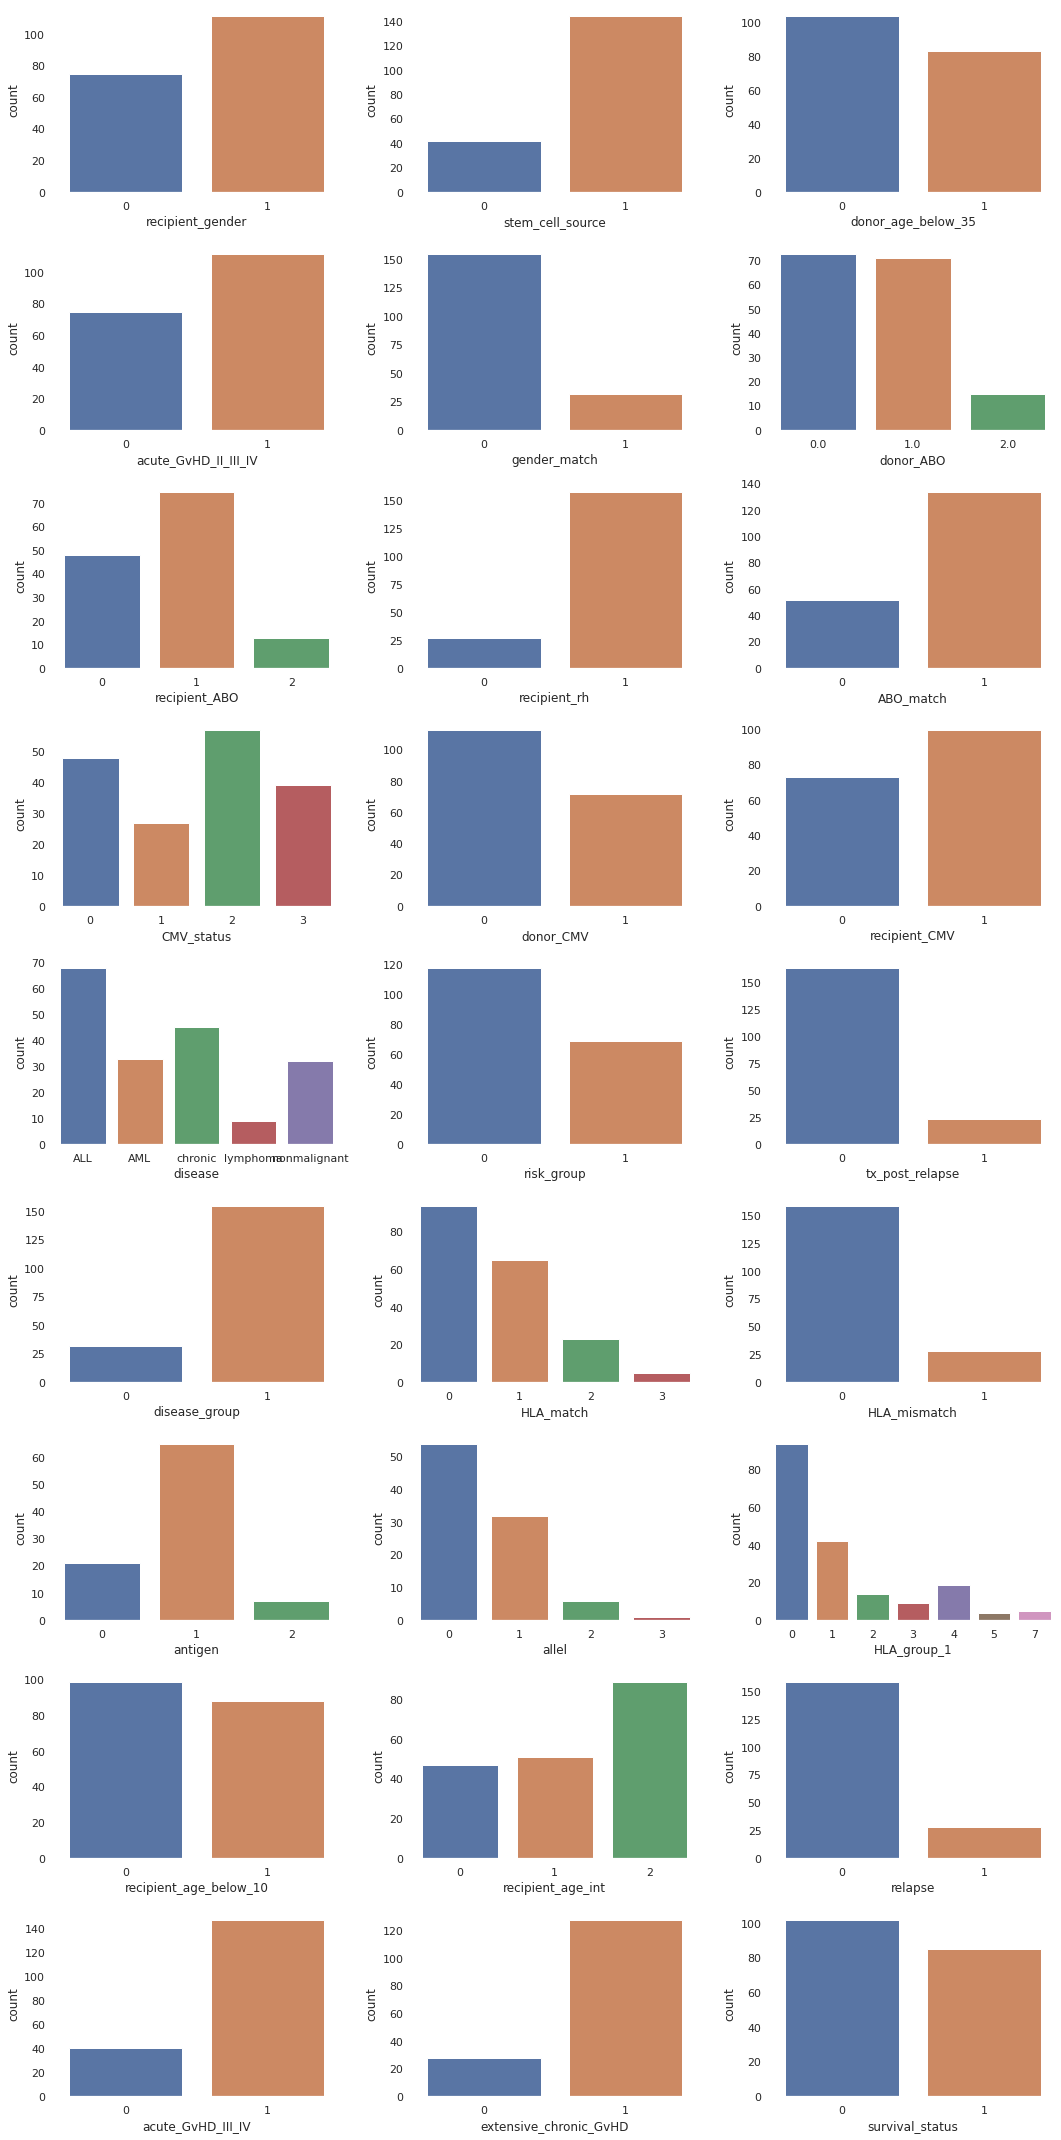

In [49]:
figure_width = 15

figure_height = 30

rows = 9

cols = 3

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(figure_width, figure_height))

# font settings
font = {'size': 15}

plt.rc('font', **font)

#fig.suptitle('Categorical Data Description')

counter = 0

for i in range(rows):

  for j in range(cols):

    bplot = sns.countplot(ax = axes[i, j],
                          x = categorical_features[counter],
                          data = data_df)
    

    counter = counter + 1

plt.tight_layout()

**Handling Missing Values**

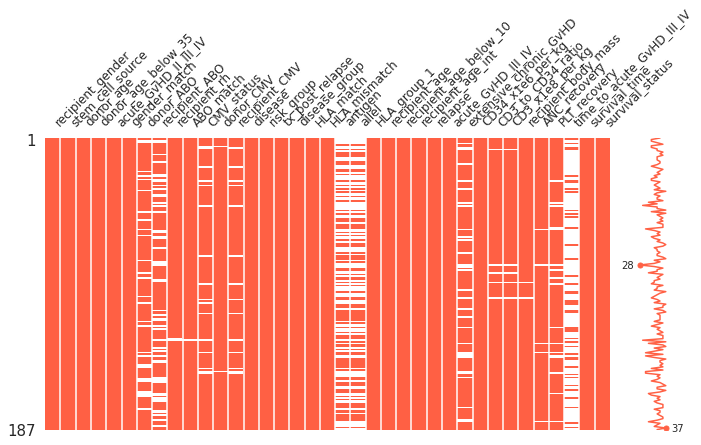

In [50]:
msno.matrix(data_df, color=(1, 0.38, 0.27), figsize=(10,5), fontsize=12)

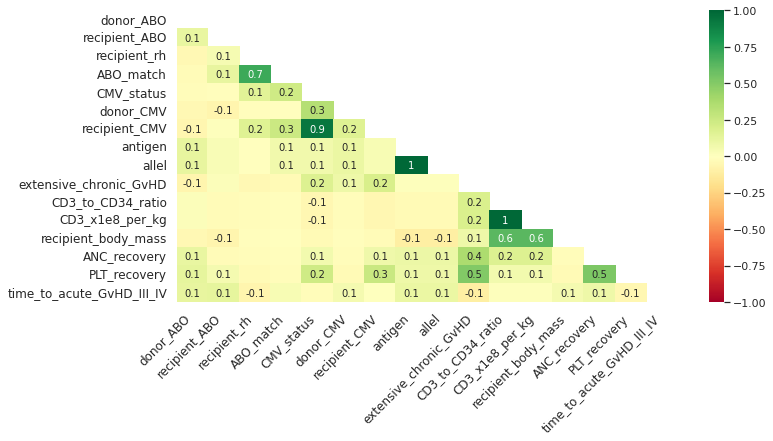

In [51]:
msno.heatmap(data_df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

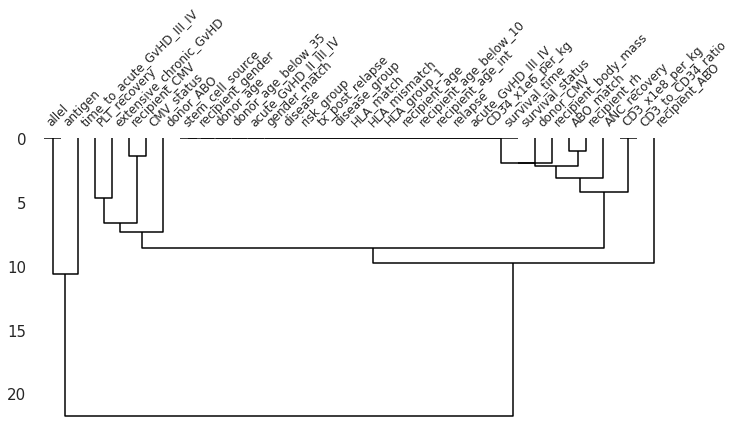

In [52]:
msno.dendrogram(data_df, method = 'ward', figsize=(10,5), fontsize=12)

**Imputation of Numerical Features**

In [53]:
missing_value_count = numerical_features_df.isnull().sum()

missing_value_percentage = numerical_features_df.isnull().mean()*100 

missing_value_count_percentage_df = pd.concat([missing_value_count, missing_value_percentage], axis = 1, keys = ['Count', 'Percentage'])

missing_value_count_percentage_df = missing_value_count_percentage_df.sort_values(by = ['Count'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  
  print(missing_value_count_percentage_df)

                           Count  Percentage
donor_age                      0    0.000000
recipient_age                  0    0.000000
CD34_x1e6_per_kg               0    0.000000
survival_time                  0    0.000000
recipient_body_mass            2    1.069519
CD3_to_CD34_ratio              5    2.673797
CD3_x1e8_per_kg                5    2.673797
ANC_recovery                   5    2.673797
PLT_recovery                  17    9.090909
time_to_acute_GvHD_III_IV    145   77.540107


In [54]:
numerical_feature_description_before_imputation = numerical_features_df.describe()
numerical_feature_description_before_imputation

,donor_age,recipient_age,CD34_x1e6_per_kg,CD3_to_CD34_ratio,CD3_x1e8_per_kg,recipient_body_mass,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time
count,187.000000,187.000000,187.000000,182.000000,182.000000,185.000000,182.000000,170.000000,42.000000,187.000000
mean,33.472068,9.931551,11.891781,5.385096,4.745714,35.801081,15.307692,31.711765,31.047619,938.743316
std,8.271826,5.305639,9.914386,9.598716,3.859128,19.650922,3.010818,37.009744,23.777374,849.589495
min,18.646575,0.600000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000
25%,27.039726,5.050000,5.350000,1.786683,1.687500,19.000000,13.000000,15.000000,16.250000,168.500000
50%,33.550685,9.600000,9.720000,2.734462,4.325000,33.000000,15.000000,21.000000,21.000000,676.000000
75%,40.117809,14.050000,15.415000,5.823565,6.785000,50.600000,17.000000,29.750000,35.500000,1604.000000
max,55.553425,20.200000,57.780000,99.560970,20.020000,103.400000,26.000000,285.000000,100.000000,3364.000000


In [55]:
imputer = missingpy.MissForest(criterion = 'squared_error')

numerical_features_df_imputed = imputer.fit_transform(numerical_features_df)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


**Rearranging Column Orders**

In [56]:
numerical_features_df[['donor_age','recipient_age','CD34_x1e6_per_kg','CD3_to_CD34_ratio','CD3_x1e8_per_kg',
                      'recipient_body_mass', 'ANC_recovery' ,'PLT_recovery','time_to_acute_GvHD_III_IV',
                       'survival_time']] = pd.DataFrame(numerical_features_df_imputed)
numerical_features_df['donor_age'][173]

41.476712

In [57]:
# numerical_features_df.drop(numerical_features_df.tail(13).index,
#         inplace = True)

In [58]:
numerical_features_df

,donor_age,recipient_age,CD34_x1e6_per_kg,CD3_to_CD34_ratio,CD3_x1e8_per_kg,recipient_body_mass,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time
0,22.830137,9.6,7.20,1.338760,5.38,35.0,19.0,51.0,32.00,999.0
1,23.342466,4.0,4.50,11.078295,0.41,20.6,16.0,37.0,36.73,163.0
2,26.394521,6.6,7.94,19.013230,0.42,23.4,23.0,20.0,36.67,435.0
3,39.684932,18.1,4.25,29.481647,0.14,50.0,23.0,29.0,19.00,53.0
4,33.358904,1.3,51.85,3.972255,13.05,9.0,14.0,14.0,50.85,2043.0
...,...,...,...,...,...,...,...,...,...,...
182,37.575342,12.9,11.08,2.522750,4.39,44.0,15.0,22.0,16.00,385.0
183,22.895890,13.9,4.64,1.038858,4.47,44.5,12.0,30.0,47.95,634.0
184,27.347945,10.4,7.73,1.635559,4.73,33.0,16.0,16.0,36.11,1895.0
185,27.780822,8.0,15.41,8.077770,1.91,24.0,13.0,14.0,54.00,382.0


In [59]:
missing_value_count = numerical_features_df.isnull().sum()

missing_value_percentage = numerical_features_df.isnull().mean()*100 

missing_value_count_percentage_df = pd.concat([missing_value_count, missing_value_percentage], axis = 1, keys = ['Count', 'Percentage'])

missing_value_count_percentage_df = missing_value_count_percentage_df.sort_values(by = ['Count'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  
  print(missing_value_count_percentage_df)

                           Count  Percentage
donor_age                      0         0.0
recipient_age                  0         0.0
CD34_x1e6_per_kg               0         0.0
CD3_to_CD34_ratio              0         0.0
CD3_x1e8_per_kg                0         0.0
recipient_body_mass            0         0.0
ANC_recovery                   0         0.0
PLT_recovery                   0         0.0
time_to_acute_GvHD_III_IV      0         0.0
survival_time                  0         0.0


In [60]:
numerical_feature_description_after_imputation = numerical_features_df.describe()
numerical_feature_description_after_imputation

,donor_age,recipient_age,CD34_x1e6_per_kg,CD3_to_CD34_ratio,CD3_x1e8_per_kg,recipient_body_mass,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,33.472068,9.931551,11.891781,5.305622,4.759107,35.837508,15.341551,32.402995,31.633262,938.743316
std,8.271826,5.305639,9.914386,9.487062,3.808237,19.670023,2.991822,35.625635,14.859441,849.589495
min,18.646575,0.600000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000
25%,27.039726,5.050000,5.350000,1.728020,1.725000,19.000000,13.000000,16.000000,21.865000,168.500000
50%,33.550685,9.600000,9.720000,2.733138,4.470000,33.000000,15.000000,21.000000,28.240000,676.000000
75%,40.117809,14.050000,15.415000,5.809483,6.575000,50.700000,17.000000,30.540000,36.485000,1604.000000
max,55.553425,20.200000,57.780000,99.560970,20.020000,103.400000,26.000000,285.000000,100.000000,3364.000000


/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

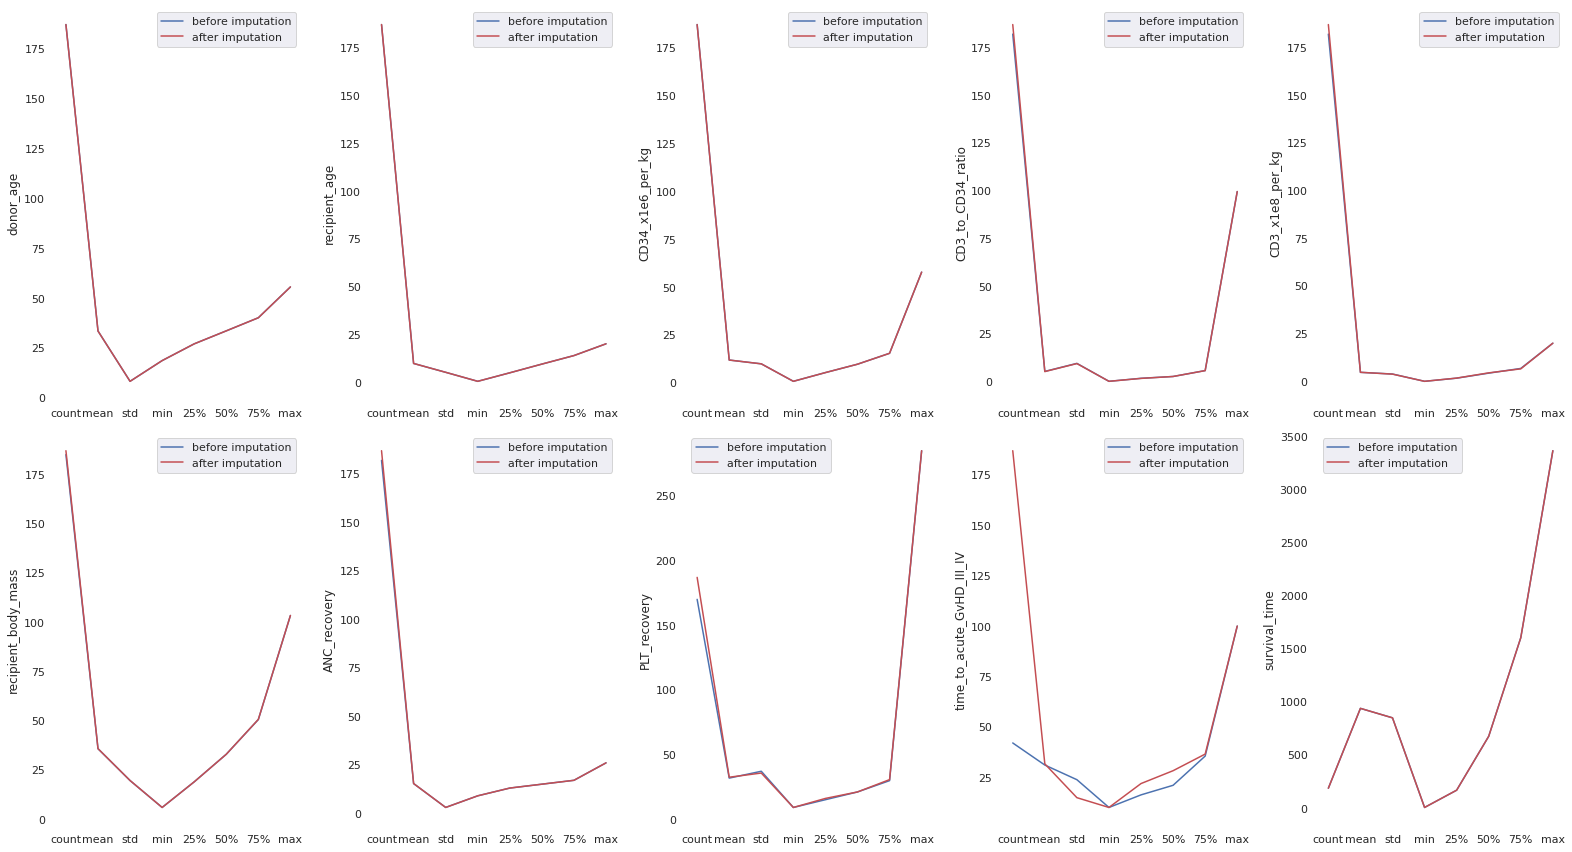

In [61]:
# compare the two df before and after the imputation

figure_width = 22

figure_height = 12

rows = 2

cols = 5

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(figure_width, figure_height))

# font settings
font = {'size': 20}

plt.rc('font', **font)

#plt.title('Box Plot: Numerical Features')

sns.set_theme(style="whitegrid")

sns.set(style="darkgrid")
 
counter = 0

for i in range(rows):

  for j in range(cols):
    sns.lineplot(ax=axes[i, j],c='b', label="before imputation", data=numerical_feature_description_before_imputation[numerical_feature_description_before_imputation.columns[counter]])
    sns.lineplot(ax=axes[i, j],c='r', label="after imputation",  data=numerical_feature_description_after_imputation[numerical_feature_description_after_imputation.columns[counter]])

    counter = counter + 1

plt.tight_layout()


In [62]:
numerical_features = numerical_features_df.columns

print(numerical_features)

Index(['donor_age', 'recipient_age', 'CD34_x1e6_per_kg', 'CD3_to_CD34_ratio',
       'CD3_x1e8_per_kg', 'recipient_body_mass', 'ANC_recovery',
       'PLT_recovery', 'time_to_acute_GvHD_III_IV', 'survival_time'],
      dtype='object')


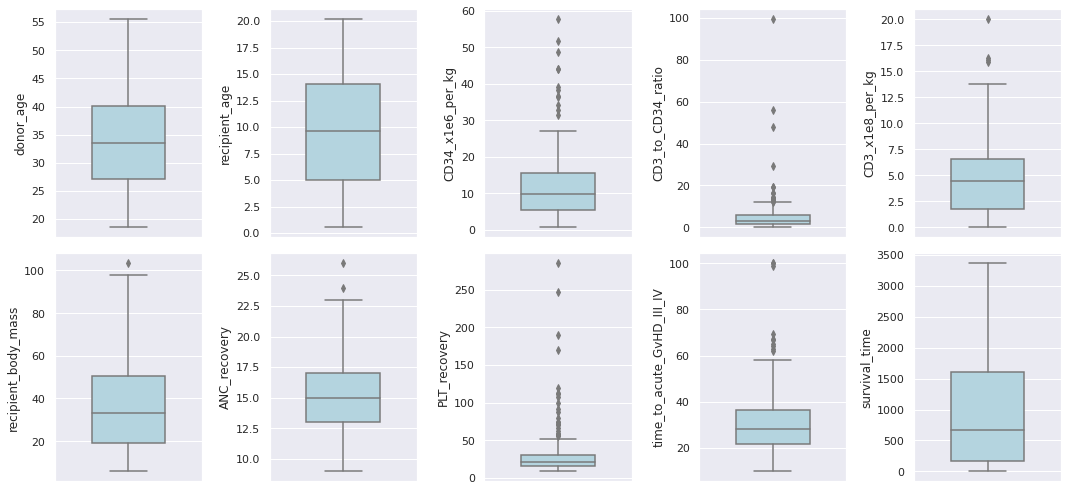

In [63]:
figure_width = 15

figure_height = 7

rows = 2

cols = 5

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(figure_width, figure_height))

# font settings
font = {'size': 15}

plt.rc('font', **font)

#fig.suptitle('Numerical Data Description')
#sns.set_theme(style="whitegrid")
sns.set(style="darkgrid")
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
counter = 0

for i in range(rows):

  for j in range(cols):
    
    

    bplot = sns.boxplot(ax=axes[i, j],
                        y = numerical_features[counter],
                        data=numerical_features_df, 
                        width=0.5,
                        dodge=False,
                        #palette="pink",
                        color='lightblue'
                        
                        )
    
    counter = counter + 1
plt.tight_layout()


**Imputation of Categorical Features**

In [64]:
categorical_features_df

,recipient_gender,stem_cell_source,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,donor_ABO,recipient_ABO,recipient_rh,ABO_match,CMV_status,...,HLA_mismatch,antigen,allel,HLA_group_1,recipient_age_below_10,recipient_age_int,relapse,acute_GvHD_III_IV,extensive_chronic_GvHD,survival_status
0,1,1,0,1,0,1.0,1,1,0,3,...,0,NaN,NaN,0,0,1,0,0,1,0
1,1,0,0,1,0,NaN,NaN,1,0,0,...,0,NaN,NaN,0,0,0,1,1,1,1
2,1,0,0,1,0,NaN,NaN,1,0,2,...,0,NaN,NaN,0,0,1,1,1,1,1
3,0,0,1,1,0,1.0,2,1,1,1,...,0,NaN,NaN,0,1,2,0,0,NaN,1
4,0,1,0,0,0,1.0,2,0,1,0,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,1,1,0,1.0,1,0,0,3,...,0,NaN,NaN,0,1,2,1,0,1,1
183,0,1,0,0,0,1.0,0,1,1,2,...,0,NaN,NaN,0,1,2,0,1,1,1
184,0,1,0,1,0,1.0,NaN,1,1,3,...,0,NaN,NaN,0,1,2,0,1,1,0
185,1,1,0,1,0,1.0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1


In [65]:
missing_value_count = categorical_features_df.isnull().sum()

missing_value_percentage = categorical_features_df.isnull().mean()*100 


missing_value_count_percentage_df = pd.concat([missing_value_count, missing_value_percentage], axis = 1, keys = ['Count', 'Percentage'])
missing_value_count_percentage_df = missing_value_count_percentage_df.sort_values(by = ['Count'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  
  print(missing_value_count_percentage_df)

                        Count  Percentage
recipient_gender            0    0.000000
acute_GvHD_III_IV           0    0.000000
relapse                     0    0.000000
recipient_age_int           0    0.000000
recipient_age_below_10      0    0.000000
HLA_group_1                 0    0.000000
HLA_mismatch                0    0.000000
HLA_match                   0    0.000000
disease_group               0    0.000000
tx_post_relapse             0    0.000000
disease                     0    0.000000
risk_group                  0    0.000000
gender_match                0    0.000000
acute_GvHD_II_III_IV        0    0.000000
donor_age_below_35          0    0.000000
stem_cell_source            0    0.000000
survival_status             0    0.000000
ABO_match                   1    0.534759
donor_CMV                   2    1.069519
recipient_rh                2    1.069519
recipient_CMV              14    7.486631
CMV_status                 16    8.556150
donor_ABO                  28   14

**Handling Categorical Missing Values**

In [66]:
categorical_features_df_with_no_missing_values = categorical_features_df.dropna(axis = 'columns')

categorical_features_df_with_no_missing_values

,recipient_gender,stem_cell_source,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,disease,risk_group,tx_post_relapse,disease_group,HLA_match,HLA_mismatch,HLA_group_1,recipient_age_below_10,recipient_age_int,relapse,acute_GvHD_III_IV,survival_status
0,1,1,0,1,0,ALL,1,0,1,0,0,0,0,1,0,0,0
1,1,0,0,1,0,ALL,0,0,1,0,0,0,0,0,1,1,1
2,1,0,0,1,0,ALL,0,0,1,0,0,0,0,1,1,1,1
3,0,0,1,1,0,AML,0,0,1,0,0,0,1,2,0,0,1
4,0,1,0,0,0,chronic,1,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,1,1,0,lymphoma,1,1,1,0,0,0,1,2,1,0,1
183,0,1,0,0,0,AML,1,0,1,0,0,0,1,2,0,1,1
184,0,1,0,1,0,nonmalignant,0,0,0,0,0,0,1,2,0,1,0
185,1,1,0,1,0,chronic,0,0,1,1,0,1,0,1,0,0,1


In [67]:
print(len(categorical_features_df_with_no_missing_values.columns))

categorical_features_df_with_no_missing_values.columns

17


Index(['recipient_gender', 'stem_cell_source', 'donor_age_below_35',
       'acute_GvHD_II_III_IV', 'gender_match', 'disease', 'risk_group',
       'tx_post_relapse', 'disease_group', 'HLA_match', 'HLA_mismatch',
       'HLA_group_1', 'recipient_age_below_10', 'recipient_age_int', 'relapse',
       'acute_GvHD_III_IV', 'survival_status'],
      dtype='object')

**Use Label Encoder in categorical_features_df_with_no_missing_values**

In [68]:
categorical_features_df_with_no_missing_values = categorical_features_df_with_no_missing_values.apply(LabelEncoder().fit_transform)

categorical_features_df_with_no_missing_values

,recipient_gender,stem_cell_source,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,disease,risk_group,tx_post_relapse,disease_group,HLA_match,HLA_mismatch,HLA_group_1,recipient_age_below_10,recipient_age_int,relapse,acute_GvHD_III_IV,survival_status
0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1
2,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1
3,0,0,1,1,0,1,0,0,1,0,0,0,1,2,0,0,1
4,0,1,0,0,0,2,1,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,1,1,0,3,1,1,1,0,0,0,1,2,1,0,1
183,0,1,0,0,0,1,1,0,1,0,0,0,1,2,0,1,1
184,0,1,0,1,0,4,0,0,0,0,0,0,1,2,0,1,0
185,1,1,0,1,0,2,0,0,1,1,0,1,0,1,0,0,1


In [69]:
categorical_features_df_with_missing_values = categorical_features_df.drop(categorical_features_df_with_no_missing_values, axis= 1)

categorical_features_df_with_missing_values

,donor_ABO,recipient_ABO,recipient_rh,ABO_match,CMV_status,donor_CMV,recipient_CMV,antigen,allel,extensive_chronic_GvHD
0,1.0,1,1,0,3,1,1,NaN,NaN,1
1,NaN,NaN,1,0,0,0,0,NaN,NaN,1
2,NaN,NaN,1,0,2,0,1,NaN,NaN,1
3,1.0,2,1,1,1,1,0,NaN,NaN,NaN
4,1.0,2,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
182,1.0,1,0,0,3,1,1,NaN,NaN,1
183,1.0,0,1,1,2,0,1,NaN,NaN,1
184,1.0,NaN,1,1,3,1,1,NaN,NaN,1
185,1.0,0,1,1,0,0,0,1,0,0


In [70]:
print(len(categorical_features_df_with_missing_values.columns))
categorical_features_df_with_missing_values.columns

10


Index(['donor_ABO', 'recipient_ABO', 'recipient_rh', 'ABO_match', 'CMV_status',
       'donor_CMV', 'recipient_CMV', 'antigen', 'allel',
       'extensive_chronic_GvHD'],
      dtype='object')

In [71]:
categorical_features_df_with_missing_values = categorical_features_df_with_missing_values.astype(float)

**Imputing Categorical Missing Values using Random Forest Clastaring**

In [72]:
def train_categorical_features(X, Y, test_size, n_estimators, max_depth, random_state, 
                        max_features, min_samples_leaf, n_jobs):

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                      test_size = test_size,  
                                                      random_state = random_state)
  
  random_forest = RandomForestClassifier(n_estimators = n_estimators, 
                                         max_depth = max_depth, 
                                         random_state = random_state, 
                                         max_features = max_features, 
                                         min_samples_leaf = min_samples_leaf, 
                                         n_jobs = n_jobs)
  
  random_forest.fit(X_train, Y_train)

  Y_test_prime = random_forest.predict(X_test)

  training_accuracy = accuracy_score(Y_test, Y_test_prime)

  return random_forest, training_accuracy

In [73]:
def impute_categorical_features(categorical_features_df_with_no_missing_values, 
                                categorical_feature_with_missing_values, 
                                categorical_features_df,
                                test_size, 
                                n_estimators, 
                                max_depth, 
                                random_state, 
                                max_features, 
                                min_samples_leaf, 
                                n_jobs):

  # merge categorical features df with no missing value with a feature that has missing values

  categorical_features_df_missing_no_missing_merged = pd.concat([categorical_features_df_with_no_missing_values,categorical_features_df[categorical_feature_with_missing_values]],axis=1)

  # df containing rows having no missing values

  categorical_features_df_missing_no_missing_merged_rows_without_missing_values = categorical_features_df_missing_no_missing_merged[~categorical_features_df_missing_no_missing_merged[categorical_feature_with_missing_values].isnull()]

  # encode labels for the df containing rows having no missing values

  label_encoder = LabelEncoder()

  categorical_features_df_missing_no_missing_merged_rows_without_missing_values_encoded = categorical_features_df_missing_no_missing_merged_rows_without_missing_values.apply(LabelEncoder().fit_transform)

  # divide the df into train splits for training

  X_train = categorical_features_df_missing_no_missing_merged_rows_without_missing_values_encoded.drop(categorical_feature_with_missing_values, axis = 1)

  Y_train = categorical_features_df_missing_no_missing_merged_rows_without_missing_values_encoded[categorical_feature_with_missing_values]

  # df containing rows having missing values

  categorical_features_df_missing_no_missing_merged_rows_with_missing_values = categorical_features_df_missing_no_missing_merged[categorical_features_df_missing_no_missing_merged[categorical_feature_with_missing_values].isnull()]

  # divide the df into test splits for testing

  X_test = categorical_features_df_missing_no_missing_merged_rows_with_missing_values.drop(categorical_feature_with_missing_values, axis = 1)

  Y_test = categorical_features_df_missing_no_missing_merged_rows_with_missing_values[categorical_feature_with_missing_values]
  
  # encode labels for the features in the testing split (without the target features)

  X_test_encoded = X_test.apply(LabelEncoder().fit_transform)

  # training model

  model, training_accuracy = train_categorical_features(X_train,
                                                        Y_train, 
                                                        test_size, 
                                                        n_estimators, 
                                                        max_depth, 
                                                        random_state, 
                                                        max_features, 
                                                        min_samples_leaf, 
                                                        n_jobs)
  
  print('Training Accuracy: {0}'.format(training_accuracy))
  
  # measurement of the model

  Y_test_prime = model.predict(X_test_encoded)

  return Y_test_prime


In [74]:
def perform_imputation_on_categorical_features(categorical_features_df_with_missing_values):

  c = 0
  
  for column in categorical_features_df_with_missing_values.columns:
    
    predicted_values = impute_categorical_features(categorical_features_df_with_no_missing_values,
                                                   categorical_features_df_with_missing_values.columns[c],
                                                   categorical_features_df,
                                                   .1, 
                                                   45, 
                                                   25,
                                                   False,
                                                   .6, 
                                                   3, 
                                                   -1)
    
    print("Predicted Values for",categorical_features_df_with_missing_values.columns[c])
    print("Predicted Values :",predicted_values)
    column_name  = categorical_features_df_with_missing_values.columns[c]

    rows =  187
    counter = 0
    for i in range(rows): 
      if pd.isna(categorical_features_df_with_missing_values[column_name][i]):
        categorical_features_df_with_missing_values[column_name][i] = predicted_values[counter]
        counter = counter + 1

    c =  c +1

perform_imputation_on_categorical_features(categorical_features_df_with_missing_values)

Training Accuracy: 0.3125
Predicted Values for donor_ABO
Predicted Values : [1 1 1 0 0 2 1 0 1 1 1 2 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0]
Training Accuracy: 0.5
Predicted Values for recipient_ABO
Predicted Values : [1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 0 1]
Training Accuracy: 0.8947368421052632
Predicted Values for recipient_rh
Predicted Values : [1 1]
Training Accuracy: 0.7368421052631579
Predicted Values for ABO_match
Predicted Values : [0]
Training Accuracy: 0.3888888888888889
Predicted Values for CMV_status
Predicted Values : [2 0 1 2 3 2 0 3 3 2 1 2 3 2 2 0]
Training Accuracy: 0.47368421052631576
Predicted Values for donor_CMV
Predicted Values : [0 1]
Training Accuracy: 0.4444444444444444
Predicted Values for recipient_CMV
Predicted Values : [0 1 1 0 1 0 1 1 1 0 1 1 1 0]
Training Accuracy: 0.6
Predicted Values for antigen
Predicted Values : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

In [75]:
categorical_features_df_with_missing_values

,donor_ABO,recipient_ABO,recipient_rh,ABO_match,CMV_status,donor_CMV,recipient_CMV,antigen,allel,extensive_chronic_GvHD
0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0
3,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
182,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0
183,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0
184,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0
185,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [76]:
categorical_features_df = pd.concat([categorical_features_df_with_no_missing_values,categorical_features_df_with_missing_values],axis=1)

categorical_features_df

,recipient_gender,stem_cell_source,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,disease,risk_group,tx_post_relapse,disease_group,HLA_match,...,donor_ABO,recipient_ABO,recipient_rh,ABO_match,CMV_status,donor_CMV,recipient_CMV,antigen,allel,extensive_chronic_GvHD
0,1,1,0,1,0,0,1,0,1,0,...,1.0,1.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0
1,1,0,0,1,0,0,0,0,1,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,0,0,1,0,0,0,0,1,0,...,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0
3,0,0,1,1,0,1,0,0,1,0,...,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,0,1,0,0,0,2,1,0,1,1,...,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,1,1,0,3,1,1,1,0,...,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0
183,0,1,0,0,0,1,1,0,1,0,...,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0
184,0,1,0,1,0,4,0,0,0,0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0
185,1,1,0,1,0,2,0,0,1,1,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
missing_value_count = categorical_features_df.isnull().sum()

missing_value_percentage = categorical_features_df.isnull().mean()*100 


missing_value_count_percentage_df = pd.concat([missing_value_count, missing_value_percentage], axis = 1, keys = ['Count', 'Percentage'])
missing_value_count_percentage_df = missing_value_count_percentage_df.sort_values(by = ['Count'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  
  print(missing_value_count_percentage_df)

                        Count  Percentage
recipient_gender            0         0.0
antigen                     0         0.0
recipient_CMV               0         0.0
donor_CMV                   0         0.0
CMV_status                  0         0.0
ABO_match                   0         0.0
recipient_rh                0         0.0
recipient_ABO               0         0.0
donor_ABO                   0         0.0
survival_status             0         0.0
acute_GvHD_III_IV           0         0.0
relapse                     0         0.0
allel                       0         0.0
recipient_age_int           0         0.0
HLA_group_1                 0         0.0
HLA_mismatch                0         0.0
HLA_match                   0         0.0
disease_group               0         0.0
tx_post_relapse             0         0.0
risk_group                  0         0.0
disease                     0         0.0
gender_match                0         0.0
acute_GvHD_II_III_IV        0     

**Q-Q Plot**

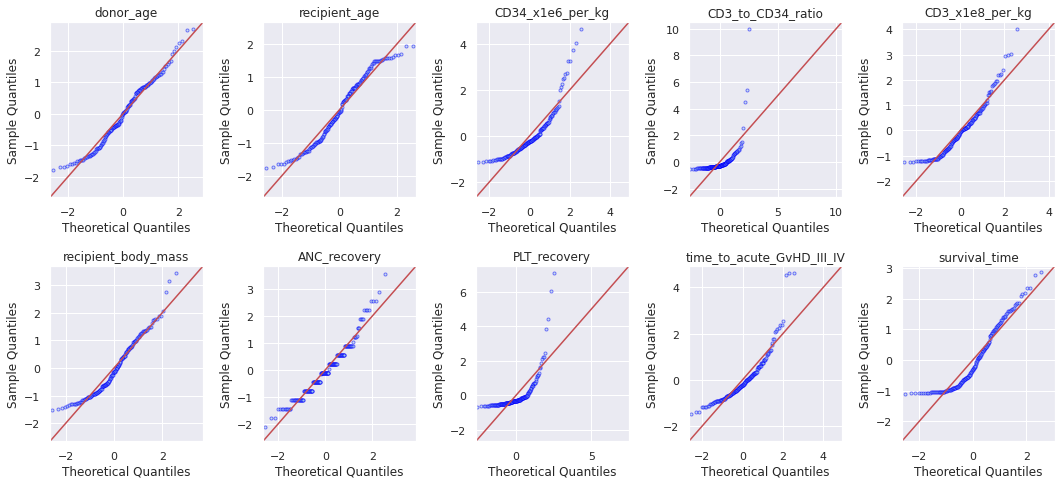

In [78]:
figure_width = 15

figure_height = 7

rows = 2

cols = 5

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(figure_width, figure_height))

# font settings
font = {'size': 15}

plt.rc('font', **font)

#fig.suptitle('Q-Q plot for numerical data')


counter = 0
nm_features = numerical_features_df.columns
for i in range(rows):

  for j in range(cols):
    qqplot = sm.qqplot(numerical_features_df[nm_features[counter]],line='45',marker='.', markerfacecolor='lightblue', markeredgecolor='blue', alpha=0.5,fit=True, dist=stats.norm,ax=axes[i, j])
    axes[i][j].set_title(str(nm_features[counter]))
    counter = counter + 1
plt.tight_layout()


# Normalization

In [79]:
numerical_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   recipient_age              187 non-null    float64
 2   CD34_x1e6_per_kg           187 non-null    float64
 3   CD3_to_CD34_ratio          187 non-null    float64
 4   CD3_x1e8_per_kg            187 non-null    float64
 5   recipient_body_mass        187 non-null    float64
 6   ANC_recovery               187 non-null    float64
 7   PLT_recovery               187 non-null    float64
 8   time_to_acute_GvHD_III_IV  187 non-null    float64
 9   survival_time              187 non-null    float64
dtypes: float64(10)
memory usage: 14.7 KB


In [80]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler(feature_range=(0,1))
# after_min_max = mms.fit_transform()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaling_data = numerical_features_df[['donor_age','recipient_age','recipient_body_mass','CD34_x1e6_per_kg','CD3_x1e8_per_kg',
                     'CD3_to_CD34_ratio','ANC_recovery','PLT_recovery','survival_time']]

numerical_features_df = numerical_features_df.drop(scaling_data,axis=1)

# sds = StandardScaler()
# after_standart_scaler = sds.fit_transform(scaling_data)
mms = MinMaxScaler(feature_range=(0,1))
after_min_max = mms.fit_transform(scaling_data)

after_standart_scaler = pd.DataFrame(after_min_max, columns = ['donor_age','recipient_age','recipient_body_mass','CD34_x1e6_per_kg','CD3_x1e8_per_kg',
                     'CD3_to_CD34_ratio','ANC_recovery','PLT_recovery','survival_time'])


numerical_features_df = pd.concat([numerical_features_df,after_standart_scaler],axis=1)
numerical_features_df.describe()

,time_to_acute_GvHD_III_IV,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,survival_time
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,31.633262,0.401700,0.476100,0.306340,0.194802,0.236192,0.051345,0.373032,0.084793,0.277768
std,14.859441,0.224127,0.270696,0.201951,0.173967,0.190602,0.095485,0.175990,0.129078,0.253005
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.865000,0.227414,0.227041,0.133470,0.080014,0.084334,0.015338,0.235294,0.025362,0.048392
50%,28.240000,0.403830,0.459184,0.277207,0.156694,0.221722,0.025454,0.352941,0.043478,0.199524
75%,36.485000,0.581768,0.686224,0.458932,0.256624,0.327077,0.056416,0.470588,0.078043,0.475878
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Creating Target Feature

In [81]:
margerd_categorical_and_numerical_df = pd.concat([categorical_features_df, numerical_features_df],axis=1)
margerd_categorical_and_numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   recipient_gender           187 non-null    int64  
 1   stem_cell_source           187 non-null    int64  
 2   donor_age_below_35         187 non-null    int64  
 3   acute_GvHD_II_III_IV       187 non-null    int64  
 4   gender_match               187 non-null    int64  
 5   disease                    187 non-null    int64  
 6   risk_group                 187 non-null    int64  
 7   tx_post_relapse            187 non-null    int64  
 8   disease_group              187 non-null    int64  
 9   HLA_match                  187 non-null    int64  
 10  HLA_mismatch               187 non-null    int64  
 11  HLA_group_1                187 non-null    int64  
 12  recipient_age_below_10     187 non-null    int64  
 13  recipient_age_int          187 non-null    int64  

In [82]:
 margerd_categorical_and_numerical_df

,recipient_gender,stem_cell_source,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,disease,risk_group,tx_post_relapse,disease_group,HLA_match,...,time_to_acute_GvHD_III_IV,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,survival_time
0,1,1,0,1,0,0,1,0,1,0,...,32.00,0.113355,0.459184,0.297741,0.112476,0.267267,0.011420,0.588235,0.152174,0.295712
1,1,0,0,1,0,0,0,0,1,0,...,36.73,0.127236,0.173469,0.149897,0.065099,0.018519,0.109446,0.411765,0.101449,0.046754
2,1,0,0,1,0,0,0,0,1,0,...,36.67,0.209932,0.306122,0.178645,0.125461,0.019019,0.189309,0.823529,0.039855,0.127755
3,0,0,1,1,0,1,0,0,1,0,...,19.00,0.570039,0.892857,0.451745,0.060712,0.005005,0.294670,0.823529,0.072464,0.013996
4,0,1,0,0,0,2,1,0,1,1,...,50.85,0.398634,0.035714,0.030801,0.895947,0.651151,0.037925,0.294118,0.018116,0.606611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,1,1,0,3,1,1,1,0,...,16.00,0.512880,0.627551,0.390144,0.180558,0.217718,0.023336,0.352941,0.047101,0.112865
183,0,1,0,0,0,1,1,0,1,0,...,47.95,0.115136,0.678571,0.395277,0.067556,0.221722,0.008401,0.176471,0.076087,0.187016
184,0,1,0,1,0,4,0,0,0,0,...,36.11,0.235766,0.500000,0.277207,0.121776,0.234735,0.014407,0.411765,0.025362,0.562537
185,1,1,0,1,0,2,0,0,1,1,...,54.00,0.247495,0.377551,0.184805,0.256536,0.093594,0.079246,0.235294,0.018116,0.111971


In [83]:
gvhd_coloumn = margerd_categorical_and_numerical_df[['acute_GvHD_III_IV','extensive_chronic_GvHD']]
gvhd_coloumn

,acute_GvHD_III_IV,extensive_chronic_GvHD
0,0,1.0
1,1,1.0
2,1,1.0
3,0,1.0
4,1,1.0
...,...,...
182,0,1.0
183,1,1.0
184,1,1.0
185,0,0.0


In [84]:
gvhd_coloumn.value_counts()

acute_GvHD_III_IV  extensive_chronic_GvHD
1                  1.0                       127
0                  1.0                        32
1                  0.0                        20
0                  0.0                         8
dtype: int64

In [85]:
gvhd = []

for col1,col2 in zip(gvhd_coloumn.acute_GvHD_III_IV, gvhd_coloumn.extensive_chronic_GvHD): 
    if col1==1 and col2==1:
        gvhd.append("Both")
    elif col1==0 and col2==0:
        gvhd.append("None")
    elif col1==1 and col2==0:
        gvhd.append("aGvHD")
    # else:
    #     gvhd.append("anyOfThem")
    elif col1==0 and col2==1:
        gvhd.append("cGvHD")    
  
gvhd   

['cGvHD',
 'Both',
 'Both',
 'cGvHD',
 'Both',
 'Both',
 'cGvHD',
 'cGvHD',
 'Both',
 'Both',
 'aGvHD',
 'aGvHD',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'aGvHD',
 'Both',
 'Both',
 'None',
 'Both',
 'Both',
 'cGvHD',
 'cGvHD',
 'Both',
 'Both',
 'Both',
 'cGvHD',
 'Both',
 'cGvHD',
 'aGvHD',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'cGvHD',
 'Both',
 'None',
 'Both',
 'cGvHD',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'cGvHD',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'aGvHD',
 'Both',
 'Both',
 'Both',
 'None',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'aGvHD',
 'Both',
 'cGvHD',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'cGvHD',
 'Both',
 'Both',
 'aGvHD',
 'aGvHD',
 'None',
 'Both',
 'Both',
 'Both',
 'Both',
 'None',
 'cGvHD',
 'aGvHD',
 'Both',
 'Both',
 'aGvHD',
 'None',
 'Both',
 'cGvHD',
 'aGvHD',
 '

In [86]:
gvhd_coloumn['GvHD_Diseases'] = gvhd

In [87]:
gvhd_coloumn

,acute_GvHD_III_IV,extensive_chronic_GvHD,GvHD_Diseases
0,0,1.0,cGvHD
1,1,1.0,Both
2,1,1.0,Both
3,0,1.0,cGvHD
4,1,1.0,Both
...,...,...,...
182,0,1.0,cGvHD
183,1,1.0,Both
184,1,1.0,Both
185,0,0.0,None


** Transform into Numerical Data **

In [88]:
GvHD = gvhd_coloumn[['GvHD_Diseases']]
label_encoding_GvHD = GvHD.apply(LabelEncoder().fit_transform)
label_encoding_GvHD

,GvHD_Diseases
0,3
1,0
2,0
3,3
4,0
...,...
182,3
183,0
184,0
185,1


In [89]:
label_encoding_GvHD['GvHD_Diseases'].value_counts()

0    127
3     32
2     20
1      8
Name: GvHD_Diseases, dtype: int64

In [90]:
final_data = pd.concat([margerd_categorical_and_numerical_df,label_encoding_GvHD],axis=1)
final_data 

,recipient_gender,stem_cell_source,donor_age_below_35,acute_GvHD_II_III_IV,gender_match,disease,risk_group,tx_post_relapse,disease_group,HLA_match,...,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,survival_time,GvHD_Diseases
0,1,1,0,1,0,0,1,0,1,0,...,0.113355,0.459184,0.297741,0.112476,0.267267,0.011420,0.588235,0.152174,0.295712,3
1,1,0,0,1,0,0,0,0,1,0,...,0.127236,0.173469,0.149897,0.065099,0.018519,0.109446,0.411765,0.101449,0.046754,0
2,1,0,0,1,0,0,0,0,1,0,...,0.209932,0.306122,0.178645,0.125461,0.019019,0.189309,0.823529,0.039855,0.127755,0
3,0,0,1,1,0,1,0,0,1,0,...,0.570039,0.892857,0.451745,0.060712,0.005005,0.294670,0.823529,0.072464,0.013996,3
4,0,1,0,0,0,2,1,0,1,1,...,0.398634,0.035714,0.030801,0.895947,0.651151,0.037925,0.294118,0.018116,0.606611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,1,1,0,3,1,1,1,0,...,0.512880,0.627551,0.390144,0.180558,0.217718,0.023336,0.352941,0.047101,0.112865,3
183,0,1,0,0,0,1,1,0,1,0,...,0.115136,0.678571,0.395277,0.067556,0.221722,0.008401,0.176471,0.076087,0.187016,0
184,0,1,0,1,0,4,0,0,0,0,...,0.235766,0.500000,0.277207,0.121776,0.234735,0.014407,0.411765,0.025362,0.562537,0
185,1,1,0,1,0,2,0,0,1,1,...,0.247495,0.377551,0.184805,0.256536,0.093594,0.079246,0.235294,0.018116,0.111971,1


In [91]:
drop_some = final_data[['acute_GvHD_III_IV','extensive_chronic_GvHD','acute_GvHD_II_III_IV']]
final_data_df = final_data.drop(drop_some, axis=1)

In [92]:
final_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   recipient_gender           187 non-null    int64  
 1   stem_cell_source           187 non-null    int64  
 2   donor_age_below_35         187 non-null    int64  
 3   gender_match               187 non-null    int64  
 4   disease                    187 non-null    int64  
 5   risk_group                 187 non-null    int64  
 6   tx_post_relapse            187 non-null    int64  
 7   disease_group              187 non-null    int64  
 8   HLA_match                  187 non-null    int64  
 9   HLA_mismatch               187 non-null    int64  
 10  HLA_group_1                187 non-null    int64  
 11  recipient_age_below_10     187 non-null    int64  
 12  recipient_age_int          187 non-null    int64  
 13  relapse                    187 non-null    int64  

**Features**

In [93]:
x = final_data_df.drop('GvHD_Diseases',axis=1)
x.shape

(187, 34)

**Target**

In [94]:
y = final_data_df['GvHD_Diseases']
y.head(5)

0    3
1    0
2    0
3    3
4    0
Name: GvHD_Diseases, dtype: int64

# p values

In [ ]:
from scipy import stats

corr_data = pd.DataFrame(columns=['r','p values'])
for col in final_data:
  if pd.api.types.is_numeric_dtype(final_data[col]) and col!='GvHD_Diseases':
    r,p = stats.pearsonr(final_data.GvHD_Diseases,final_data[col])
    corr_data.loc[col] = [round(r,3),round(p,3)]

corr_data

,r,p values
recipient_gender,0.025,0.732
stem_cell_source,0.014,0.844
donor_age_below_35,0.073,0.320
acute_GvHD_II_III_IV,0.438,0.000
gender_match,0.052,0.480
disease,-0.078,0.290
risk_group,0.045,0.538
tx_post_relapse,-0.010,0.895
disease_group,0.175,0.017
HLA_match,0.176,0.016


# Balancing The Dataset

In [156]:
x

,donor_age_below_35,disease_group,HLA_match,recipient_ABO,allel,time_to_acute_GvHD_III_IV
0,0,1,0,1.0,0.0,32.00
1,0,1,0,1.0,0.0,36.73
2,0,1,0,1.0,0.0,36.67
3,1,1,0,2.0,0.0,19.00
4,0,1,1,2.0,0.0,50.85
...,...,...,...,...,...,...
503,1,1,2,1.0,1.0,19.00
504,1,1,2,1.0,1.0,34.00
505,1,1,1,1.0,0.0,18.00
506,1,1,3,1.0,2.0,16.00


In [157]:
x.shape

(508, 6)

In [158]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
x, y = ros.fit_resample(x,y)


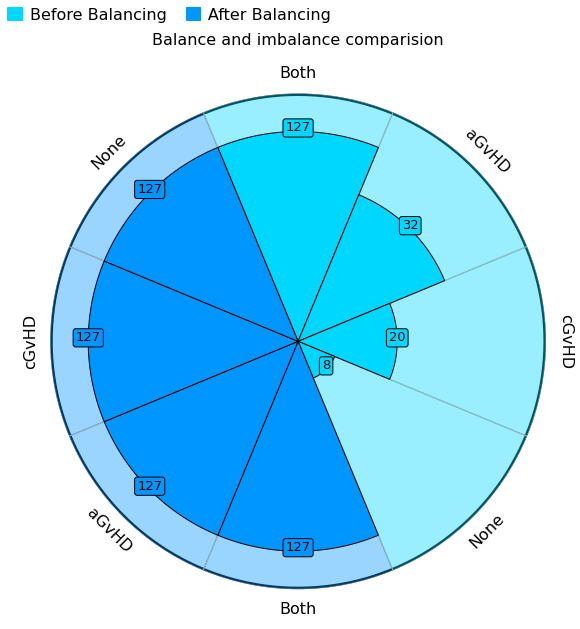

In [159]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt


params = ["Both","aGvHD","cGvHD","None",  
         "Both","aGvHD","cGvHD","None" 
          ]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [127 , 32, 20, 8,
         127,127,127,127]

# minimum range value and maximum range value for parameters
min_range = [0, 0, 0, 0,0,0,0,0]
max_range = [150, 50, 50, 50,150, 150, 150, 150]

# color for the slices and text
slice_colors = ["#00D7FF"] * 4 + ["#0096FF"] * 4  
text_colors = ["#000000"] * 8 
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#FFFFFF",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=5,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=0          # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices

    kwargs_params=dict(
        color="#000000", fontsize=16, zorder=5,  
         va="center"
    ),                             # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#000000", fontsize=13,
        zorder=5,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.960, "Balance and imbalance comparision", size=16,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = ""
CREDIT_2 = ""

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
     color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.05, 1.0, "Before Balancing        After Balancing", size=16,
     color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.01, 1), 0.025, 0.021, fill=True, color="#00D7FF",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.32, 1), 0.025, 0.021, fill=True, color="#0096FF",
        transform=fig.transFigure, figure=fig
    )
])
plt.savefig('/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory/images/balance.svg',
            bbox_inches='tight',
            transparent=True)
plt.show()
plt.tight_layout()
plt.close()

In [160]:
x.shape

(508, 6)

In [161]:
y.shape

(508,)

In [162]:
check = pd.concat([x, y],axis=1)

In [163]:
check

,donor_age_below_35,disease_group,HLA_match,recipient_ABO,allel,time_to_acute_GvHD_III_IV,GvHD_Diseases
0,0,1,0,1.0,0.0,32.00,3
1,0,1,0,1.0,0.0,36.73,0
2,0,1,0,1.0,0.0,36.67,0
3,1,1,0,2.0,0.0,19.00,3
4,0,1,1,2.0,0.0,50.85,0
...,...,...,...,...,...,...,...
503,1,1,2,1.0,1.0,19.00,3
504,1,1,2,1.0,1.0,34.00,3
505,1,1,1,1.0,0.0,18.00,3
506,1,1,3,1.0,2.0,16.00,3


In [164]:
dis_plot = check[['stem_cell_source', 'donor_age_below_35', 'disease_group', 'HLA_match','relapse',
          'donor_ABO','ABO_match','allel','CMV_status']]

KeyError: ignored

In [ ]:
fig = plt.figure(figsize = (10, 10))
j = 0
for i in dis_plot:
  if (i != 'GvHD_Diseases'):
      plt.subplot(3, 3, j+1)
      j += 1
      ax = sns.distplot(x[i][check['GvHD_Diseases']==0],    color='#fcba03', label = 'Both')
      ax = sns.distplot(x[i][check['GvHD_Diseases']==1],    color='#054afa', label = 'None')
      ax = sns.distplot(x[i][check['GvHD_Diseases']==2],    color='#aef5ef', label = 'Acute GvHD')
      ax = sns.distplot(x[i][check['GvHD_Diseases']==3],    color='black', label = 'Chronic GvHD')
      if(j == 1):
        plt.legend(loc='best')
      
      # ax.set_xticklabels(normal_Dstribution[i])
      # ax.set_yticklabels("Density", fontsize=22,weight = 'bold')

    
      # plt.legend(loc='best')
      
# fig.suptitle('Finally Selected Featues With Respect to GvHD Disease Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
 
plt.savefig('/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory/images/data.svg',
            bbox_inches='tight',
            transparent=True)
plt.show()
plt.tight_layout()
plt.close()

# Feature Engineering

In [ ]:
correlation_matrix = x.corr()
correlation_matrix

In [ ]:
plt.figure(figsize=(20,10))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]>threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

correlated_features = correlation(x,0.8)
correlated_features

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)
 
features= x
 
model.fit(x,y)
 
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
 
#if you don't want the absolute value
#feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[i for i in model.coef_[0]]})
#feature_importance.sort_values('feature_importance',ascending=False)


In [ ]:
x_features = x.drop(correlated_features,axis=1)
x_features.shape

In [ ]:
plt.figure(figsize=(20,10))
corre_matrix = x_features.corr()
sns.heatmap(corre_matrix,annot=True,cmap=plt.cm.CMRmap_r)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Feature Section

In [165]:
### Apply Feature Selection
#1 first, I specify the Lasso Regression model, and I
#1 select a suitable alpha (equivalent of penalty).
#1 The bigger the alpha the less features that will be selected.

#1 Then I use the selectFromModel object from sklearn, which
#1 will select the features which coefficients are non-zero

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.05, random_state=0)) 
feature_sel_model.fit(x_features, y)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [166]:
feature_sel_model.get_support()
feature_sel_model

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [167]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_features.columns[(feature_sel_model.get_support())]

#let's print some stats
print('total features: {}'.format((x_features.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(selected_feat)

total features: 27
selected features: 6
Index(['donor_age_below_35', 'disease_group', 'HLA_match', 'recipient_ABO',
       'allel', 'time_to_acute_GvHD_III_IV'],
      dtype='object')


In [168]:
x = x_features[selected_feat]

In [169]:
x

,donor_age_below_35,disease_group,HLA_match,recipient_ABO,allel,time_to_acute_GvHD_III_IV
0,0,1,0,1.0,0.0,32.00
1,0,1,0,1.0,0.0,36.73
2,0,1,0,1.0,0.0,36.67
3,1,1,0,2.0,0.0,19.00
4,0,1,1,2.0,0.0,50.85
...,...,...,...,...,...,...
503,1,1,2,1.0,1.0,19.00
504,1,1,2,1.0,1.0,34.00
505,1,1,1,1.0,0.0,18.00
506,1,1,3,1.0,2.0,16.00


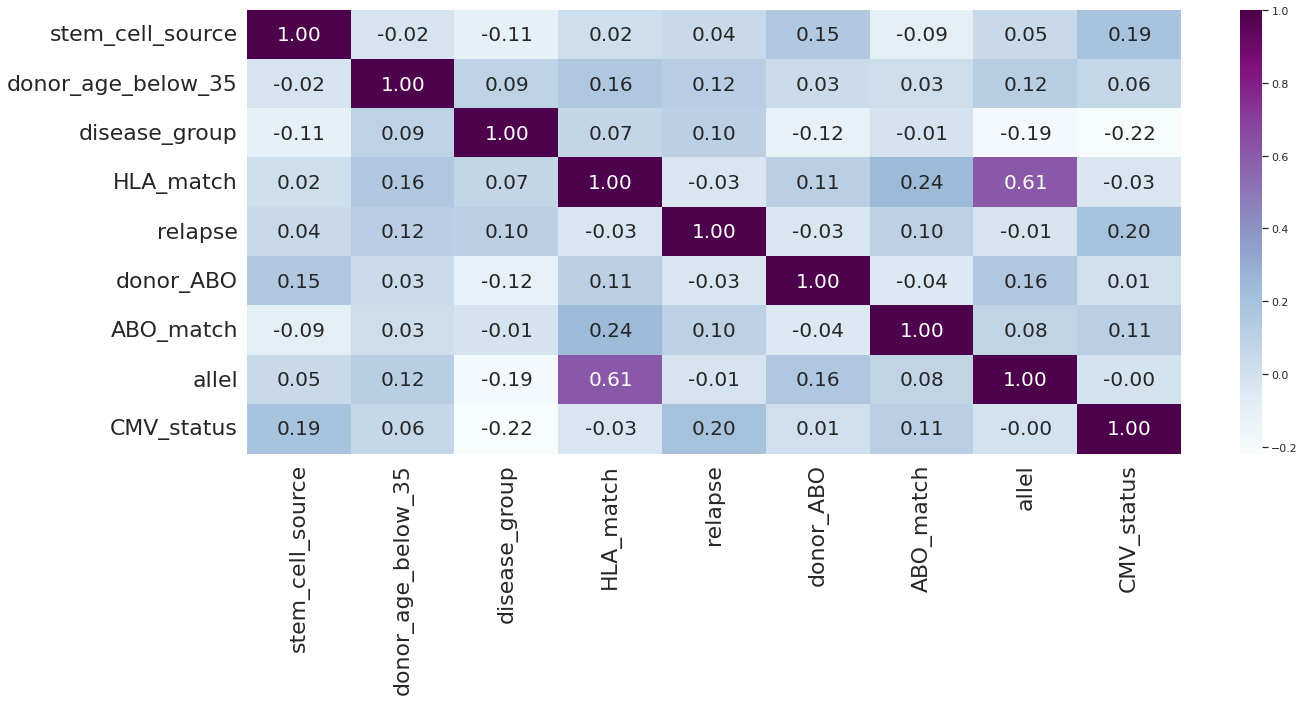

In [170]:
plt.figure(figsize=(20,10))
final_matrix = dis_plot.corr()
sns.heatmap(final_matrix,fmt='.2f', annot_kws={"size": 20}, annot=True,cmap='BuPu')
plt.xticks(fontsize = 22)
plt.xticks(rotation = 90)
 
plt.yticks(fontsize=22)
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory/images/matrix.svg',
        # bbox_inches='tight',
            format=None,  
            bbox_inches=None,
            transparent=True)
plt.show()
plt.close()

In [171]:
# pair_plot = final_data[['survival_status', 'survival_time', 'recipient_ABO', 'relapse', 'allel',
#        'antigen', 'disease_group', 'recipient_CMV', 'donor_ABO', 'donor_CMV','HLA_match', 'risk_group',
#        'gender_match','GvHD_Diseases']]

In [172]:
#pairplot using target GvHD_Diseases Column
# sns.pairplot(pair_plot, hue='GvHD_Diseases')
# plt.show()

In [173]:
merged_features_with_target = pd.concat([x, y],axis=1)
merged_features_with_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age_below_35         508 non-null    int64  
 1   disease_group              508 non-null    int64  
 2   HLA_match                  508 non-null    int64  
 3   recipient_ABO              508 non-null    float64
 4   allel                      508 non-null    float64
 5   time_to_acute_GvHD_III_IV  508 non-null    float64
 6   GvHD_Diseases              508 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.9 KB


In [174]:
merged_features_with_target

,donor_age_below_35,disease_group,HLA_match,recipient_ABO,allel,time_to_acute_GvHD_III_IV,GvHD_Diseases
0,0,1,0,1.0,0.0,32.00,3
1,0,1,0,1.0,0.0,36.73,0
2,0,1,0,1.0,0.0,36.67,0
3,1,1,0,2.0,0.0,19.00,3
4,0,1,1,2.0,0.0,50.85,0
...,...,...,...,...,...,...,...
503,1,1,2,1.0,1.0,19.00,3
504,1,1,2,1.0,1.0,34.00,3
505,1,1,1,1.0,0.0,18.00,3
506,1,1,3,1.0,2.0,16.00,3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

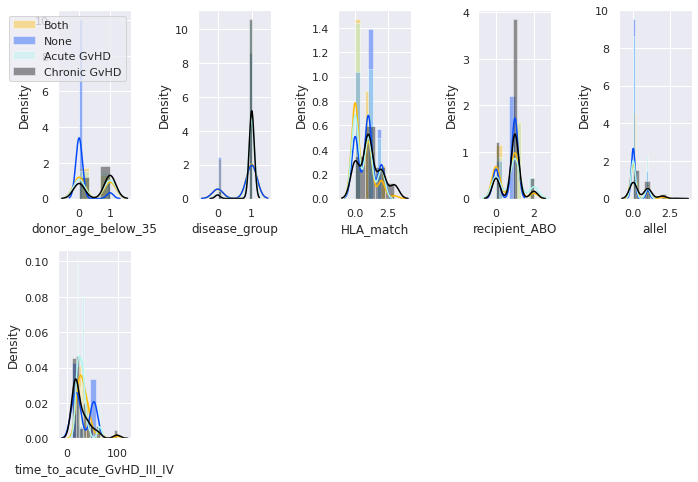

In [175]:
fig = plt.figure(figsize = (10, 10))
j = 0
for i in merged_features_with_target:
  if (i != 'GvHD_Diseases'):
      plt.subplot(3, 5, j+1)
      j += 1
      ax = sns.distplot(x[i][merged_features_with_target['GvHD_Diseases']==0],    color='#fcba03', label = 'Both')
      ax = sns.distplot(x[i][merged_features_with_target['GvHD_Diseases']==1],    color='#054afa', label = 'None')
      ax = sns.distplot(x[i][merged_features_with_target['GvHD_Diseases']==2],    color='#aef5ef', label = 'Acute GvHD')
      ax = sns.distplot(x[i][merged_features_with_target['GvHD_Diseases']==3],    color='black', label = 'Chronic GvHD')
      if(j == 1):
        plt.legend(loc='best')
      
      # ax.set_xticklabels(normal_Dstribution[i])
      # ax.set_yticklabels("Density", fontsize=22,weight = 'bold')

    
      # plt.legend(loc='best')
      
# fig.suptitle('Finally Selected Featues With Respect to GvHD Disease Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
 
plt.show()
 

# Visualization


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

KeyError: ignored

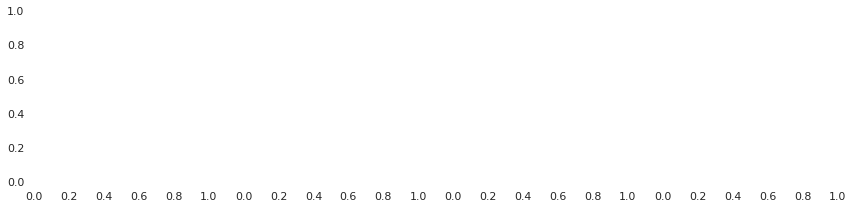

In [ ]:
g = sns.FacetGrid(merged_features_with_target, col='GvHD_Diseases')
g.map(plt.hist, 'recipient_ABO', bins=10)

In [ ]:
g = sns.FacetGrid(merged_features_with_target, col='GvHD_Diseases')
g.map(plt.hist, 'recipient_age_below_10', bins=5)

In [ ]:
merged_features_with_target.groupby(['HLA_match','GvHD_Diseases']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go

def hyper_parameter_tuning(model):

  max_features_range = np.arange(1,6,1)
  n_estimators_range = np.arange(10,210,10)
  param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)


  grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
  X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)
  grid.fit(X_train, y_train)

  # print("The best parameters are %s with a score of %0.2f"
  #     % (grid.best_params_, grid.best_score_))
  grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
  # print(grid_results.head())
  grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
  grid_reset = grid_contour.reset_index()
  grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
  grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
  print(grid_pivot)

  x_ax = grid_pivot.columns.levels[1].values
  y_ax = grid_pivot.index.values
  z_ax = grid_pivot.values

 

  # X and Y axes labels
  layout = go.Layout(
              xaxis=go.layout.XAxis(
                title=go.layout.xaxis.Title(
                text='n_estimators')
              ),
              yaxis=go.layout.YAxis(
                title=go.layout.yaxis.Title(
                text='max_features') 
              ) )

  fig = go.Figure(data = [go.Contour(z=z_ax, x=x_ax, y=y_ax)], layout=layout )

  fig.update_layout(title='Hyperparameter tuning', autosize=False,
                    width=500, height=500,
                    margin=dict(l=65, r=50, b=65, t=90))

  fig.show()

  return
 



In [ ]:
hyper_parameter_tuning(RandomForestClassifier())

              Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.906444  0.911382  0.906444  0.901506  0.911412  0.903975   
2             0.886691  0.913851  0.906444  0.901536  0.908943  0.911412   
3             0.889160  0.916350  0.913851  0.916350  0.923728  0.916320   
4             0.911412  0.913881  0.911442  0.911412  0.906474  0.911412   
5             0.908973  0.899067  0.904035  0.911442  0.903975  0.918790   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.906444  0.906444  0.899036  0.899036  0.906444  0.903975   
2             0.908943  0.906444  0.908913  0.911382  0.916320  0.908913   
3          

In [ ]:
hyper_parameter_tuning(GradientBoostingClassifier())

              Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.694550  0.738723  0.760855  0.775640  0.792864  0.783077   
2             0.711804  0.760855  0.758537  0.805300  0.817585  0.827431   
3             0.748570  0.770762  0.812647  0.842246  0.839717  0.861939   
4             0.768172  0.788076  0.842216  0.847124  0.869286  0.903794   
5             0.773141  0.812617  0.842216  0.861849  0.884071  0.893917   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.805269  0.805269  0.810208  0.829901  0.834839  0.839747   
2             0.842246  0.849654  0.876754  0.874315  0.876694  0.889039   
3          

In [ ]:
hyper_parameter_tuning(lgb.LGBMClassifier())

              Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.746251  0.783228  0.800452  0.825083  0.854682  0.859651   
2             0.746251  0.783228  0.800452  0.825083  0.854682  0.859651   
3             0.746251  0.783228  0.800452  0.825083  0.854682  0.859651   
4             0.746251  0.783228  0.800452  0.825083  0.854682  0.859651   
5             0.746251  0.783228  0.800452  0.825083  0.854682  0.859651   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.867028  0.871996  0.881873  0.886811  0.899067  0.899067   
2             0.867028  0.871996  0.881873  0.886811  0.899067  0.899067   
3          

In [ ]:
hyper_parameter_tuning(XGBClassifier())

# Different Machine Learning Algorithms

*** Accuracy ***

In [176]:
def cross_validation_score(features, target, model):

  cv = KFold(n_splits=10, random_state=42, shuffle=True)
  # evaluate model
  scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # scores_RF = np.round((mean(scores_RF),2)*100
  scores = mean(scores) *100   
  # report performance
  # return validation score
  return scores


In [177]:
def machine_learning_model(x_features, y_target, model_name):

  X_train, X_test, y_train, y_test = train_test_split( x_features, y_target, test_size = 0.2)
  model_name.fit( X_train, y_train )
  y_pred =  model_name.predict(X_test)

  final_model_predictions  = pd.DataFrame({'Actual':y_test , 'predictions':y_pred})
  #print(final_model_predictions)
  print("-----------------------------------------------")
  cv_score = cross_validation_score(x_features, y_target, model_name)
  print("Cross Validation Accuracy :",cv_score)
  print("-----------------------------------------------")

  recall = metrics.recall_score(final_model_predictions.Actual, final_model_predictions.predictions,pos_label='positive',
                                           average='micro')
  print('recall :',recall)
  precision =metrics.precision_score(final_model_predictions.Actual, final_model_predictions.predictions,pos_label='neg',
                                            average='micro')
  print('Precision :',precision)

  F1_score = 2 * (precision * recall) / (precision + recall)
  print('F1 Score :',F1_score)
  print("-----------------------------------------------")

 

  return cv_score, recall, precision, F1_score, y_pred, y_test, X_test;


In [178]:
x = x[selected_feat]
x

,donor_age_below_35,disease_group,HLA_match,recipient_ABO,allel,time_to_acute_GvHD_III_IV
0,0,1,0,1.0,0.0,32.00
1,0,1,0,1.0,0.0,36.73
2,0,1,0,1.0,0.0,36.67
3,1,1,0,2.0,0.0,19.00
4,0,1,1,2.0,0.0,50.85
...,...,...,...,...,...,...
503,1,1,2,1.0,1.0,19.00
504,1,1,2,1.0,1.0,34.00
505,1,1,1,1.0,0.0,18.00
506,1,1,3,1.0,2.0,16.00


In [179]:
y

0      3
1      0
2      0
3      3
4      0
      ..
503    3
504    3
505    3
506    3
507    3
Name: GvHD_Diseases, Length: 508, dtype: int64

In [180]:
model_random_forest = RandomForestClassifier(n_estimators = 200, random_state = 24)
cv_score_RF, recall_RF, precision_RF, F1_score_RF, y_pred_RF, y_test_RF, x_test_RF = machine_learning_model(x, y, model_random_forest)


-----------------------------------------------
Cross Validation Accuracy : 92.52549019607844
-----------------------------------------------
recall : 0.9019607843137255
Precision : 0.9019607843137255
F1 Score : 0.9019607843137255
-----------------------------------------------


In [181]:
model_decision_Tree = DecisionTreeClassifier (random_state = 42)
cv_score_DT, recall_DT, precision_DT, F1_score_DT, y_pred_DT, y_test_DT, x_test_DT = machine_learning_model(x, y, model_decision_Tree)

-----------------------------------------------
Cross Validation Accuracy : 91.94117647058823
-----------------------------------------------
recall : 0.9313725490196079
Precision : 0.9313725490196079
F1 Score : 0.9313725490196079
-----------------------------------------------


In [182]:
model_K_Nearest = KNeighborsClassifier(n_neighbors=4)
cv_score_KNN, recall_KNN, precision_KNN, F1_score_KNN, y_pred_KNN, y_test_KNN, x_test_KNN = machine_learning_model(x, y, model_K_Nearest)

-----------------------------------------------
Cross Validation Accuracy : 85.61568627450981
-----------------------------------------------
recall : 0.8529411764705882
Precision : 0.8529411764705882
F1 Score : 0.8529411764705882
-----------------------------------------------


In [183]:
model_Gradient_Boosting = GradientBoostingClassifier()
cv_score_GB, recall_GB, precision_GB, F1_score_GB, y_pred_GB, y_test_GB, x_test_GB = machine_learning_model(x, y, model_Gradient_Boosting)

-----------------------------------------------
Cross Validation Accuracy : 92.72156862745098
-----------------------------------------------
recall : 0.8529411764705882
Precision : 0.8529411764705882
F1 Score : 0.8529411764705882
-----------------------------------------------


In [184]:
model_XG_Boosting = XGBClassifier()
cv_score_XG, recall_XG, precision_XG, F1_score_XG, y_pred_XG, y_test_XG, x_test_XG = machine_learning_model(x, y, model_XG_Boosting)

-----------------------------------------------
Cross Validation Accuracy : 90.55294117647058
-----------------------------------------------
recall : 0.8921568627450981
Precision : 0.8921568627450981
F1 Score : 0.8921568627450981
-----------------------------------------------


In [185]:
model_LG_Boosting = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
cv_score_LG, recall_LG, precision_LG, F1_score_LG, y_pred_LG, y_test_LG, x_test_LG = machine_learning_model(x, y, model_LG_Boosting)

-----------------------------------------------
Cross Validation Accuracy : 89.36470588235294
-----------------------------------------------
recall : 0.8725490196078431
Precision : 0.8725490196078431
F1 Score : 0.8725490196078431
-----------------------------------------------


In [186]:
table=pd.DataFrame({                    
                    "Accuracy ":[cv_score_RF, cv_score_DT, cv_score_KNN, 
                                cv_score_GB, cv_score_XG, cv_score_LG,],
                    
                    "Recall ":[recall_RF, recall_DT, recall_KNN, 
                              recall_GB, recall_XG,  recall_LG],
                    
                    "Precision ":[precision_RF, precision_DT, precision_KNN,
                                  precision_GB, precision_XG, precision_LG],
                    
                    "F1 Score ":[F1_score_RF, F1_score_DT, F1_score_KNN, 
                                 F1_score_GB, F1_score_XG, F1_score_LG]},
                   
                   index=["Random Forest",'Decision Tree Classifier', "K-Nearest Neighbors Algorithm",
                          'Gradient Boosting Classifier',"XG Boosting Classification",
                          "Light GBM Boosting "])
table

,Accuracy,Recall,Precision,F1 Score
Random Forest,92.525490,0.901961,0.901961,0.901961
Decision Tree Classifier,91.941176,0.931373,0.931373,0.931373
K-Nearest Neighbors Algorithm,85.615686,0.852941,0.852941,0.852941
Gradient Boosting Classifier,92.721569,0.852941,0.852941,0.852941
XG Boosting Classification,90.552941,0.892157,0.892157,0.892157
Light GBM Boosting,89.364706,0.872549,0.872549,0.872549


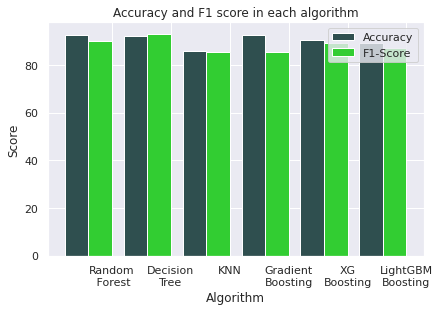

In [187]:
import numpy as np 
import matplotlib.pyplot as plt 


X = ['Random\n Forest','Decision\nTree','KNN',
     'Gradient\nBoosting','XG\nBoosting','LightGBM\nBoosting']
accuracy = [cv_score_RF, cv_score_DT, cv_score_KNN, 
            cv_score_GB, cv_score_XG, cv_score_LG]
f1 = [F1_score_RF*100 , F1_score_DT*100 , F1_score_KNN*100, 
      F1_score_GB*100, F1_score_XG*100, F1_score_LG*100]
  
X_axis = np.arange(len(X))

#fig = plt.figure(figsize = (10, 8))  
plt.bar(X_axis-0.6, accuracy, 0.4, label = 'Accuracy',color='darkslategray')
plt.bar(X_axis-0.2, f1, 0.4, label = 'F1-Score',color='limegreen')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and F1 score in each algorithm")
plt.legend()

plt.show()

# Confussion Matrix

In [188]:
def show_confusion_matrix_2(y_test , y_pred, model_name):
  cf_matrix  = confusion_matrix(y_test, y_pred)
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(4,4)
  font = {'size': 15}

  plt.rc('font', **font)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  plt.title('Confusion Matrix For '+model_name, fontsize=15)
  ax.set_xlabel('\nPredicted Values',fontsize=15)
  ax.set_ylabel('Actual Values' ,fontsize=15);

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['None','Both','aGvHD','cGvHD'],fontsize=15)
  ax.yaxis.set_ticklabels(['None','Both','aGvHD','cGvHD'],fontsize=15)

  ## Display the visualization of the Confusion Matrix.
  plt.savefig('/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory/images/confusion/random.svg',
            bbox_inches='tight',
            transparent=True)
  plt.show()
  plt.tight_layout()
  plt.close()

In [143]:
def show_confusion_matrix(y_test , y_pred, model_name):
  
  cm  = confusion_matrix(y_test, y_pred)

  # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
  # ax = sns.heatmap(cm/np.sum(cm), annot=True, 
  #           fmt='.2%', cmap='Blues')
 
  cm_df = pd.DataFrame(cm,cm/np.sum(cm),
                      index = ['None','Success','Both','Suicide'], 
                      columns = ['None','Success','Both','Suicide'])

  #Plotting the confusion matrix
  plt.figure(figsize=(5,4))
  font = {'size': 15}

  plt.rc('font', **font)
  sns.heatmap(cm_df, fmt= '.2%', annot=True,      square=True)
  plt.title('Confusion Matrix For '+model_name, fontsize=15)
  plt.ylabel('Actal Values',fontsize=15)
  plt.xlabel('Predicted Values',  fontsize=15)
  plt.show()
  # print(cm_df)

In [ ]:
figure_width = 20

figure_height = 10

# rows = 2

# cols = 3

# fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(figure_width, figure_height))

# font settings
font = {'size': 35}

plt.rc('font', **font)
#fig.suptitle('Numerical Data Description')


axes[0][0] = show_confusion_matrix(y_test_RF , y_pred_RF, "Random Forest")
axes[0][1] = show_confusion_matrix(y_test_DT , y_pred_DT, "Decision Tree")
axes[0][2] = show_confusion_matrix(y_test_KNN , y_pred_KNN, "K-Nearest-Neighbour")
axes[1][0] = show_confusion_matrix(y_test_GB , y_pred_GB, "Gradient Boosting Classifier")
axes[1][1] = show_confusion_matrix(y_test_XG , y_pred_XG, "XG Boosting Classifier")
axes[1][2] = show_confusion_matrix(y_test_LG , y_pred_LG, "MLP")
plt.title('Confusion Matrix For MLP', fontsize=15)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
    
plt.tight_layout()

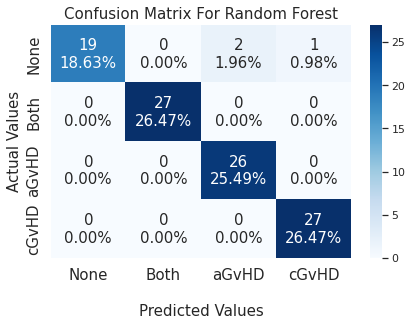

In [147]:
show_confusion_matrix_2(y_test_RF , y_pred_RF, "Random Forest")

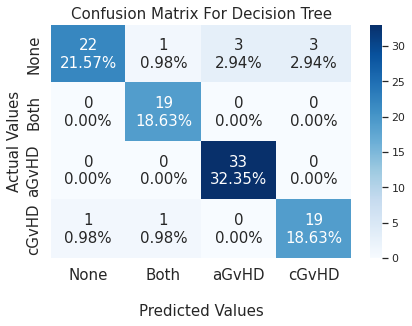

In [148]:
show_confusion_matrix_2(y_test_DT , y_pred_DT, "Decision Tree")

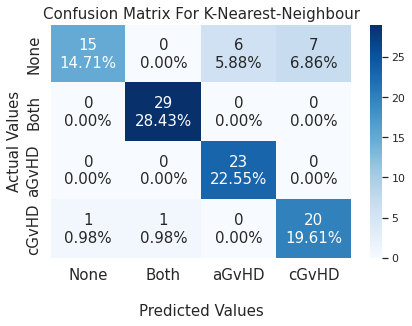

In [149]:
show_confusion_matrix_2(y_test_KNN , y_pred_KNN, "K-Nearest-Neighbour")

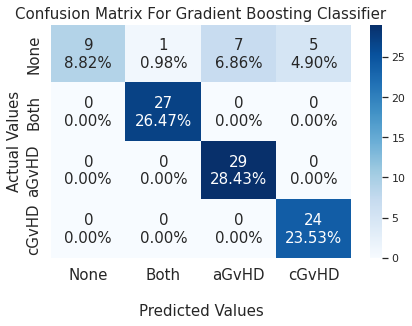

In [151]:
show_confusion_matrix_2(y_test_GB , y_pred_GB, "Gradient Boosting Classifier")

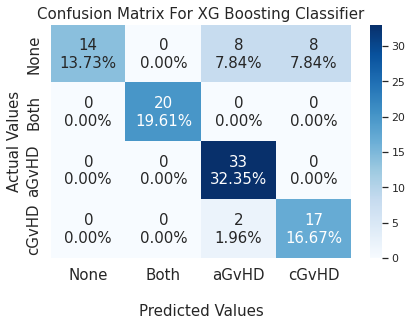

In [152]:
show_confusion_matrix_2(y_test_XG , y_pred_XG, "XG Boosting Classifier")

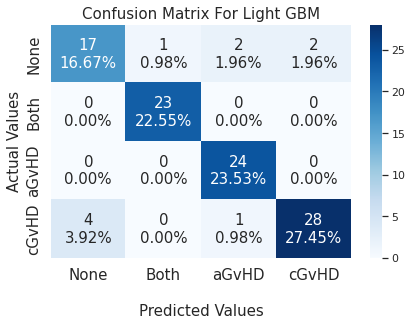

In [153]:
show_confusion_matrix_2(y_test_LG , y_pred_LG, "Light GBM")

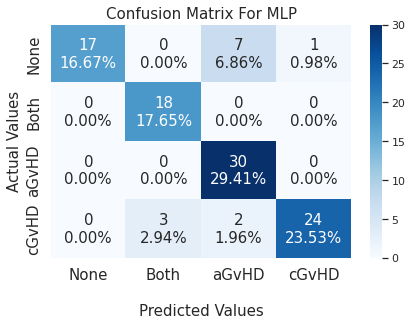

In [189]:
show_confusion_matrix_2(y_test_LG , y_pred_LG, "MLP")

In [ ]:
show_confusion_matrix_2(y_test_RF , y_pred_RF, "Random Forest")

In [ ]:
show_confusion_matrix_2(y_test_DT , y_pred_DT, "Decision Tree")

# Validation Curve

In [ ]:
def show_validaton_curve_2(model,x,y,param_name,cv,scoring,model_name):
  # Import Required libraries
  import matplotlib.pyplot as plt
  import numpy as np
  from sklearn.model_selection import validation_curve

  # Setting the range for the parameter (from 1 to 10)
  parameter_range = np.arange(1, 30, 1)
  train_score, test_score = validation_curve(model, 
                                              x, 
                                              y, 
                                              param_name=param_name, 
                                              param_range=parameter_range,
                                              cv=cv, 
                                              scoring=scoring,
                                              n_jobs=-1)

  # Calculating mean and standard deviation of training score
  mean_train_score = np.mean(train_score, axis = 1)
  std_train_score = np.std(train_score, axis = 1)
  
  # Calculating mean and standard deviation of testing score
  mean_test_score = np.mean(test_score, axis = 1)
  std_test_score = np.std(test_score, axis = 1)
  
  # Plot mean accuracy scores for training and testing scores
  plt.plot(parameter_range, mean_train_score,
      label = "Training Score", color = 'b')
  plt.plot(parameter_range, mean_test_score,
    label = "Cross Validation Score", color = 'r')
  font = {'size': 15}

  plt.rc('font', **font)

  
  # Creating the plot
  plt.title("Validation Curve for "+model_name)
  plt.xlabel("Number of Epoch")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()

In [ ]:
def show_validaton_curve(model,x,y,param_name,cv,scoring,model_name):
  parameter_range = np.arange(1, 20, 1)
  train_score, test_score = validation_curve(model, 
                                             x, 
                                             y, 
                                             param_name=param_name, 
                                             param_range=parameter_range,
                                             cv=cv, 
                                             scoring=scoring, 
                                             n_jobs=-1)
  # Calculating mean and standard deviation of training score
  mean_train_score = np.mean(train_score, axis = 1)
  std_train_score = np.std(train_score, axis = 1)
  # Calculating mean and standard deviation of testing score
  mean_test_score = np.mean(test_score, axis = 1)
  std_test_score = np.std(test_score, axis = 1)

  # Plot mean accuracy scores for training and testing scores
  plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
  plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'r')
  
  # Creating the plot
  plt.title("Validation Curve with "+model_name, fontsize = 15)
  plt.xlabel("Number of Epoch", fontsize = 15)
  plt.ylabel("Accuracy", fontsize = 15)
  plt.yticks(fontsize=14)
  plt.xticks(fontsize=14)
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.savefig('/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory/images/validation/decision.svg',
            bbox_inches='tight',
            transparent=True)
  plt.show()
  plt.tight_layout()
  plt.close()



In [ ]:
figure_width = 15

figure_height = 7


# font settings
font = {'size': 15}

plt.rc('font', **font)

#fig.suptitle('Numerical Data Description')


axes[0][0] = show_validaton_curve(RandomForestClassifier(),x,y,"n_estimators",3,"accuracy","Random Forest")
axes[0][1] = show_validaton_curve(DecisionTreeClassifier(),x,y,"max_depth",5,"accuracy","Decision Tree")
axes[0][2] = show_validaton_curve(KNeighborsClassifier(),x,y,"n_neighbors",5,"accuracy","K-Nearest-Neighbour")
axes[1][0] = show_validaton_curve(GradientBoostingClassifier(),x,y,"max_depth",5,"accuracy","Gradient Boosting Classifier")
axes[1][1] = show_validaton_curve(XGBClassifier(),x,y,"max_depth",5,"accuracy", "XG Boosting Classifier")
axes[1][2] = show_validaton_curve(lgb.LGBMClassifier(),x,y,"max_depth",5,"accuracy", "Light GM Boosting Classifer")
    
    
plt.tight_layout()

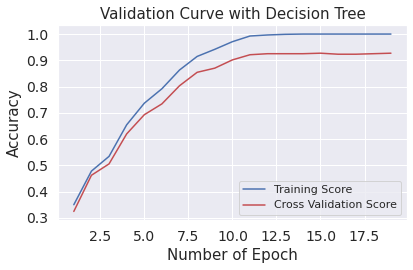

In [ ]:
show_validaton_curve(DecisionTreeClassifier(),x,y,"max_depth",5,"accuracy","Decision Tree")

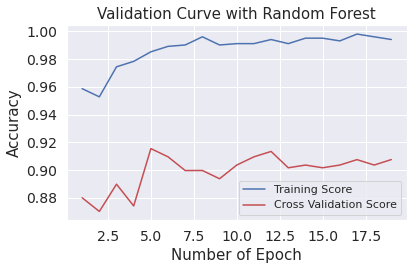

In [ ]:
show_validaton_curve(RandomForestClassifier(),x,y,"n_estimators",3,"accuracy","Random Forest")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt
 
# Create training and test split
def show_learning_curve(model,x,y):

  X_train, X_test, y_train, y_test = train_test_split(x, 
                                                      y, 
                                                      test_size=0.3, 
                                                      stratify=y, 
                                                      random_state=42)
  # Create a pipeline; This will be passed as an estimator to learning curve method
  #
  pipeline = make_pipeline(StandardScaler(),
                           model())
  #
  # Use learning curve to get training and test scores along with train sizes
  #
  train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                        cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                      n_jobs=1)
  #
  # Calculate training and test mean and std
  #
  train_mean = np.mean(train_scores, axis=1) 
  train_std = np.std(train_scores, axis=1) 
  test_mean = np.mean(test_scores, axis=1)+.2 
  test_std = np.std(test_scores, axis=1) 
  #
  # Plot the learning curve
  #
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  #plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  #plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title('Learning Curve for Decision Tree',fontsize = 15)
  plt.xlabel('Training Data Size',fontsize = 15)
  plt.ylabel('Model accuracy',fontsize = 15)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.grid()
  plt.legend(loc='lower right')
  plt.savefig('/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory/images/learning/decision.svg',
            bbox_inches='tight',
            transparent=True)
  plt.show()
  plt.tight_layout()
  plt.close()

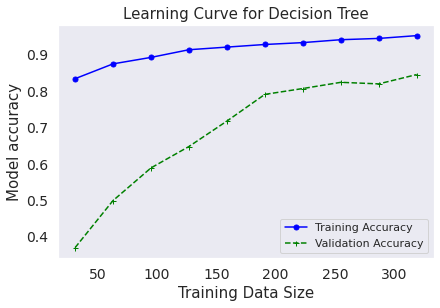

In [ ]:
from sklearn.ensemble import RandomForestRegressor
show_learning_curve(RandomForestRegressor,x,y)

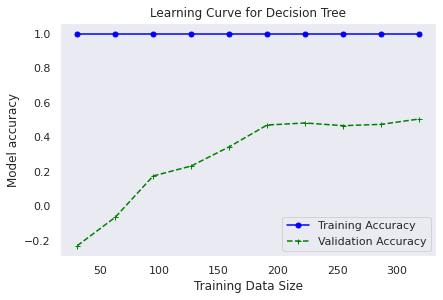

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
show_learning_curve(DecisionTreeRegressor,x,y)

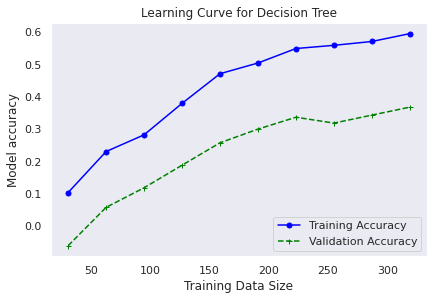

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
 
show_learning_curve(KNeighborsRegressor ,x,y)

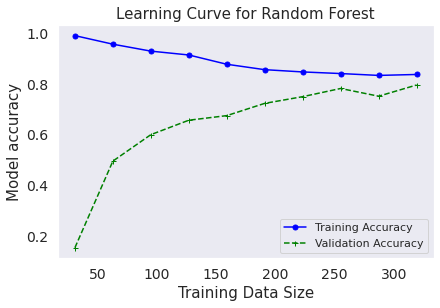

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
show_learning_curve(GradientBoostingRegressor ,x,y)

In [ ]:
from xgboost import XGBRegressor
show_learning_curve(XGBRegressor ,x,y)

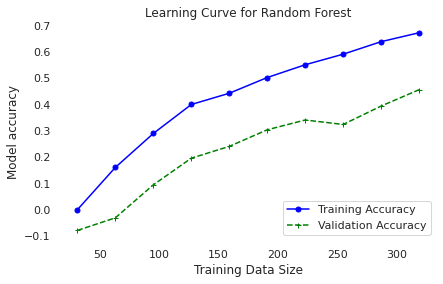

In [ ]:
import lightgbm as ltb
model  = ltb.LGBMRegressor
show_learning_curve(model ,x,y)

# ROC Curve

In [190]:
from sklearn.metrics import roc_curve, roc_auc_score

def show_roc_curve(model,x_test, model_name):
  y_pred_cnb = model.predict(x_test)
  y_prob_pred_cnb = model.predict_proba(x_test)
 
  #roc auc score
  score = roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')
  print("AUC ROC Score", score)

  # roc curve for classes
  fpr = {}
  tpr = {}
  thresh ={}
  n_class = 4

#roc auc score
  for i in range(n_class): 
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
  
  # plotting 
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class None vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class Both vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class aGvHD vs Rest')
  plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Class cGvHD vs Rest')
  plt.title('Multiclass ROC Curve for '+model_name , fontsize =15 )
  plt.xlabel('False Positive Rate',fontsize =15)
  plt.ylabel('True Positive rate',fontsize =15)
  plt.xticks(fontsize = 14)
  plt.xticks(fontsize = 14)
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory/images/auc/random_auc.svg',
            bbox_inches='tight',
            transparent=True)
  plt.show()
  plt.tight_layout()
  plt.close()

In [191]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)

In [192]:
# figure_width = 15
# figure_height = 7

# rows = 2
# cols = 3
# fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(figure_width, figure_height))

#   # font settings
# font = {'size': 15}
# plt.rc('font', **font)

# #fig.suptitle('Numerical Data Description')
# algorithms = [model_random_forest, model_decision_Tree, model_K_Nearest,
#               model_Gradient_Boosting, model_XG_Boosting, model_LG_Boosting]
# count = 0
# for i in range(rows):
#   for j in range(cols):
#     axes[i][j] = show_roc_curve(algorithms[count],X_test)
#     count = count + 1      
      
# plt.tight_layout()
# # show_roc_curve(i,X_test)


AUC ROC Score 0.9973305062765846


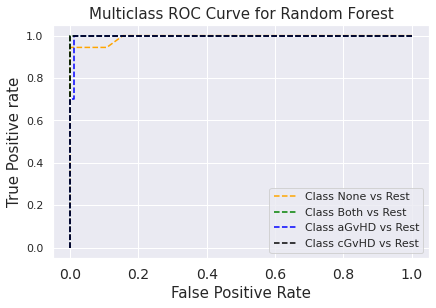

In [193]:
show_roc_curve(model_random_forest,X_test, "Random Forest")

AUC ROC Score 0.9840232389251997


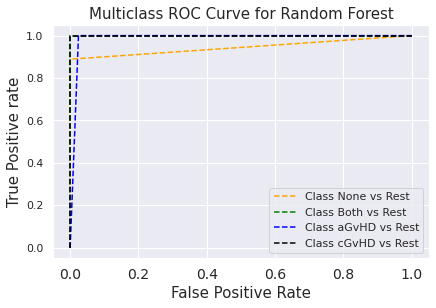

In [194]:
show_roc_curve(model_decision_Tree,X_test, "Random Forest")

AUC ROC Score 0.9917924577238302


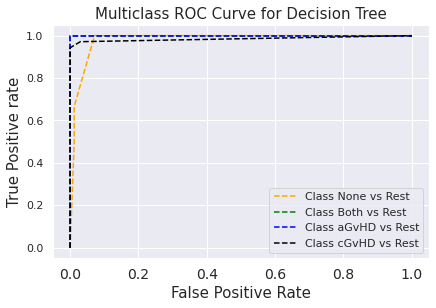

In [195]:
show_roc_curve(model_K_Nearest,X_test, "Decision Tree")

AUC ROC Score 0.9980379188712521


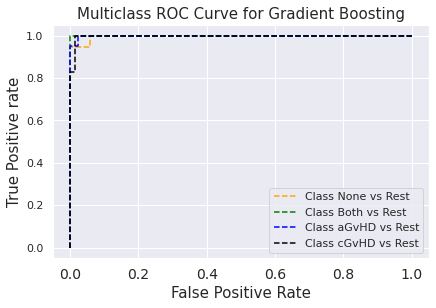

In [196]:
show_roc_curve(model_Gradient_Boosting,X_test, "Gradient Boosting")

AUC ROC Score 0.9917924577238302


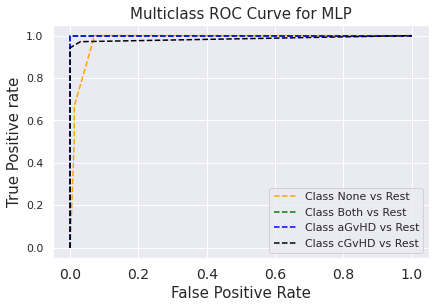

In [200]:
show_roc_curve(model_K_Nearest,X_test, "MLP")

AUC ROC Score 0.9976903724452745


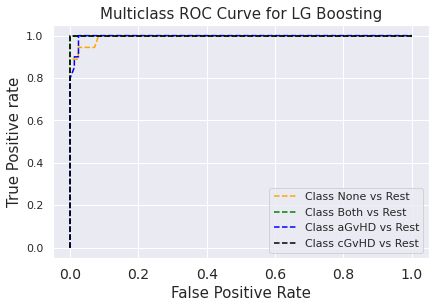

In [198]:
show_roc_curve(model_LG_Boosting,X_test, "LG Boosting")

#  Radar Chart and Sankey Diagram

In [ ]:
algorithm = pd.DataFrame(['RF','DT','KNN',
     'GB','XGB','LGBM'])

accuracy = pd.DataFrame([cv_score_RF, cv_score_DT, cv_score_KNN, 
            cv_score_GB, cv_score_XG, cv_score_LG])

recall = pd.DataFrame([recall_RF, recall_DT, recall_KNN, 
                              recall_GB, recall_XG,  recall_LG])

precision = pd.DataFrame([precision_RF, precision_DT, precision_KNN,
                                  precision_GB, precision_XG, precision_LG])

f1 = pd.DataFrame([F1_score_RF*100 , F1_score_DT*100 , F1_score_KNN*100, 
      F1_score_GB*100, F1_score_XG*100, F1_score_LG*100])

radar_data = pd.concat([algorithm,accuracy,recall,precision,f1],axis=1)

radar_data.columns = ['Algorithms', 'Accuracy', 'Recall', 'Precision','F1Score']

radar_data

,Algorithms,Accuracy,Recall,Precision,F1Score
0,RF,93.317647,0.941176,0.941176,94.117647
1,DT,93.913725,0.931373,0.931373,93.137255
2,KNN,83.674510,0.794118,0.794118,79.411765
3,GB,92.917647,0.950980,0.950980,95.098039
4,XGB,88.376471,0.901961,0.901961,90.196078
5,LGBM,88.972549,0.872549,0.872549,87.254902


In [ ]:
from mplsoccer import Radar

low =  [0, 00, 0, 0]
high = [100, 1, 1, 100]

RandomForest = []
DecisionTree = []
KNearest = []
GradientBoosting = []
XGBoosting = []
LightGMBoosting = []

for x in range(len(radar_data['Algorithms'])):
    if radar_data['Algorithms'][x] == 'RF':
        RandomForest = radar_data.iloc[x].values.tolist()
    if radar_data['Algorithms'][x] == 'DT':
        DecisionTree = radar_data.iloc[x].values.tolist()
    if radar_data['Algorithms'][x] == 'KNN':
        KNearest = radar_data.iloc[x].values.tolist()
    if radar_data['Algorithms'][x] == 'GB':
        GradientBoosting = radar_data.iloc[x].values.tolist()
    if radar_data['Algorithms'][x] == 'XGB':
        XGBoosting = radar_data.iloc[x].values.tolist()
    if radar_data['Algorithms'][x] == 'LGBM':
        LightGMBoosting = radar_data.iloc[x].values.tolist()
        
    
RandomForest = RandomForest[1:]
DecisionTree = DecisionTree[1:]
KNearest = KNearest[1:]
GradientBoosting = GradientBoosting[1:]
XGBoosting = XGBoosting[1:]
LightGMBoosting = LightGMBoosting[1:]


**Sankey Diagram**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

label = ['RF','DT','KNN','GB','XGB','LGBM','Accuracy','Recall','Precision','F1Score']
source = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5]
target = [6,7,8,9,6,7,8,9,6,7,8,9,6,7,8,9,6,7,8,9,6,7,8,9]
value = [97.843137,	0.990196,	0.990196,	99.019608,
         94.698039,	0.901961,	0.901961,	90.196078,
         84.058824,	0.813725,	0.813725,	81.372549,
         96.066667,	0.931373,	0.931373,	93.137255,
         92.925490,	0.931373,	0.931373,	93.137255,
         95.278431,	0.970588,	0.970588,	97.058824]

color_link = ['#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5',
              '#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5',
              '#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5',
              '#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5',
              '#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5',
              '#EBBAB5','#FEF3C7','#A6E3D7','#CBB4D5']

link = dict(source=source,target=target,value=value,color=color_link)
node = dict(label=label,pad=35,thickness=10)
data = go.Sankey(link=link,node=node)

In [ ]:
fig = go.Figure(data)
fig.update_layout(hovermode='x',
                  title='Machine Learning Algorithms',
                  font=dict(size=10,color='white'),
                  paper_bgcolor='#51504f')

fig.show()

In [ ]:
import plotly.graph_objects as go

categories = ['Accuracy','Precision', 'Recall','F1 Score']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[.96, .92, .89, .86],
      theta=categories,
      fill='toself',
      name='Random Forest'
))
fig.add_trace(go.Scatterpolar(
      r=[.91, .96, .89, .87],
      theta=categories,
      fill='toself',
      name='Decision Tree'
))
fig.add_trace(go.Scatterpolar(
      r=[.83, .8, .8, .81],
      theta=categories,
      fill='toself',
      name='KNN'
))
fig.add_trace(go.Scatterpolar(
      r=[.4, .93, .91, .91],
      theta=categories,
      fill='toself',
      name='Gradient Boosting'
))
fig.add_trace(go.Scatterpolar(
      r=[.92, .89, .89, .86],
      theta=categories,
      fill='toself',
      name='XG Boosting'
))
fig.add_trace(go.Scatterpolar(
      r=[.94, .92, .89, .86],
      theta=categories,
      fill='toself',
      name='LGM Boosting'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()

# Result Analysis

In [ ]:
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.3 MB/s 


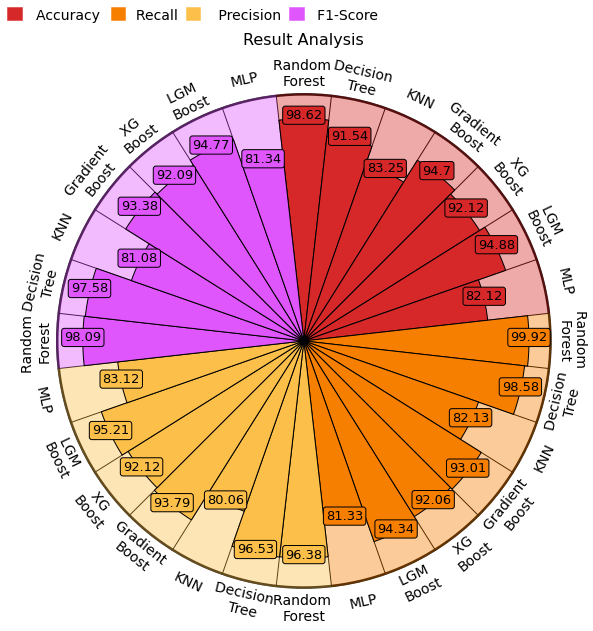

In [ ]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt


params = ["Random \nForest", "Decision \nTree", "KNN", "Gradient \nBoost", "XG \nBoost","LGM \nBoost","MLP",  
          "Random \nForest", "Decision \nTree", "KNN", "Gradient \nBoost", "XG \nBoost","LGM \nBoost","MLP",  
          "Random \nForest", "Decision \nTree", "KNN", "Gradient \nBoost", "XG \nBoost","LGM \nBoost","MLP",
          "Random \nForest", "Decision \nTree", "KNN", "Gradient \nBoost", "XG \nBoost","LGM \nBoost","MLP"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [98.62, 91.54,83.25, 94.7, 92.12, 94.88,82.12,
         99.92, 98.58, 82.13, 93.01, 92.06, 94.34,81.33,
          96.38, 96.53, 80.06, 93.79, 92.12, 95.21,83.12,
          98.09, 97.58, 81.08, 93.38, 92.09, 94.77,81.34
         ]

# minimum range value and maximum range value for parameters
min_range = [0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
max_range = [110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 
             110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,110,110,110,110]

# color for the slices and text
slice_colors = ["#d62828"] * 7 + ["#f77f00"] * 7  + ["#fcbf49"] * 7  + ["#e056fd"] * 7
text_colors = ["#000000"] * 28 
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#FFFFFF",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=5,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=0          # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices

    kwargs_params=dict(
        color="#000000", fontsize=14, zorder=5,
         va="center"
    ),                             # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#000000", fontsize=13,
         zorder=5,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.960, "Result Analysis", size=16,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = ""
CREDIT_2 = ""

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
     color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.05, 1.0, "Accuracy        Recall         Precision        F1-Score", size=14,
     color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.0, 1), 0.025, 0.021, fill=True, color="#d62828",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.18, 1), 0.025, 0.021, fill=True, color="#f77f00",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.31, 1), 0.025, 0.021, fill=True, color="#fcbf49",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.49, 1), 0.025, 0.021, fill=True, color="#e056fd",
        transform=fig.transFigure, figure=fig
    )
])

plt.savefig('/content/drive/MyDrive/1821900_Md junayed Hossain 1821844_Jannatul Ferdaus 1821450_Saifur Rahman/Bone Marrow Transplant/input_directory/images/result.svg',
            bbox_inches='tight',
            transparent=True)
plt.show()
plt.tight_layout()
plt.close()

# Tabnet

In [ ]:
pip install git+https://github.com/dreamquark-ai/tabnet

In [ ]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetMultiTaskClassifier
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score

ImportError: ignored

In [ ]:
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier

In [ ]:
!pip install pytorch_tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
x_numpy = x.to_numpy()
y_numpy = y.to_numpy()

In [ ]:
x_numpy.shape

(508, 8)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x_numpy, y_numpy, test_size = 0.2)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(406, 8) (102, 8) (406,) (102,)


In [ ]:
y_train= np.expand_dims(y_train,axis=1)
y_test= np.expand_dims(y_test,axis=1)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(406, 8) (102, 8) (406, 1) (102, 1)


In [ ]:
# define the model
clf1_nopreproc = TabNetMultiTaskClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
# clf1_nopreproc.fit(
#     x_train,y_train,
#     eval_set=[(x_train, y_train), (x_test, y_test)],
#     eval_name=['train', 'valid'],
#     eval_metric=['auc','accuracy'],
#     max_epochs=1000 , patience=50,
#     batch_size=256, virtual_batch_size=128,
#     num_workers=0,
#     weights=1,  
#     drop_last=False
# )

clf1_nopreproc.fit(
    X_train=x_train, y_train=y_train,
    eval_set=[(x_train, y_train), (x_test, y_test)],
    eval_name=['train', 'valid'],
    max_epochs=100 , patience=20,
    batch_size=128, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    loss_fn=[torch.nn.functional.cross_entropy]*4 # Optional, just an example of list usage
) 

epoch 0  | loss: 1.77201 | train_logloss: 2.09494 | valid_logloss: 1.98329 |  0:00:00s
epoch 1  | loss: 1.3241  | train_logloss: 1.71308 | valid_logloss: 1.66137 |  0:00:00s
epoch 2  | loss: 1.18818 | train_logloss: 1.45567 | valid_logloss: 1.54579 |  0:00:01s
epoch 3  | loss: 1.08337 | train_logloss: 1.38363 | valid_logloss: 1.46332 |  0:00:01s
epoch 4  | loss: 1.01648 | train_logloss: 1.45924 | valid_logloss: 1.47152 |  0:00:01s
epoch 5  | loss: 0.92339 | train_logloss: 1.59084 | valid_logloss: 1.49808 |  0:00:01s
epoch 6  | loss: 0.87175 | train_logloss: 1.81954 | valid_logloss: 1.65249 |  0:00:01s
epoch 7  | loss: 0.83937 | train_logloss: 1.9584  | valid_logloss: 1.68082 |  0:00:02s
epoch 8  | loss: 0.78952 | train_logloss: 1.95036 | valid_logloss: 1.65844 |  0:00:02s
epoch 9  | loss: 0.77036 | train_logloss: 1.99012 | valid_logloss: 1.69864 |  0:00:02s
epoch 10 | loss: 0.71515 | train_logloss: 2.04883 | valid_logloss: 1.744   |  0:00:02s
epoch 11 | loss: 0.6355  | train_logloss: 2

# TabNet

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.1 MB/s 
     |████████████████████████████████| 81 kB 9.6 MB/s 
     |████████████████████████████████| 209 kB 59.1 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 147 kB 44.1 MB/s 
     |████████████████████████████████| 112 kB 54.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=a71a4d715bbd5a9b8c9614d7270b31f08b9ae9bc411c7dcd25cb2d5b05e1cc9d
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
!pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 575 kB/s 


In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor, TabNetClassifier
from sklearn.model_selection import KFold
import torch

In [ ]:
import optuna
from optuna import Trial, visualization

In [ ]:
def Objective(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_da = trial.suggest_int("n_da", 56, 64, step=2)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=2)
    gamma = trial.suggest_float("gamma", 1., 1.4, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(dis_plot):  ## X-TRAIN DATA IS smote_missforest_predictor
        X_train, X_valid = dis_plot.iloc[train_index], dis_plot.iloc[test_index]
        y_train, y_valid = y[train_index], y[test_index]  ## Y-TRAIN DATA IS smote_missforest_target
        regressor = TabNetClassifier(**tabnet_params)
        # regressor = TabNetRegressor(**tabnet_params)
        regressor.fit(X_train=X_train.values, y_train=y_train.values,
                  eval_set=[(X_valid.values, y_valid)],
                  patience=trial.suggest_int("patience",low=15,high=30), max_epochs=trial.suggest_int('epochs', 1, 10),
                  eval_metric=['accuracy'])
        CV_score_array.append(regressor.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [ ]:
study = optuna.create_study(direction="minimize", study_name='TabNet optimization')
study.optimize(Objective, timeout=6*60) #5 hours

In [ ]:
TabNet_params = study.best_params

In [ ]:
print(TabNet_params)

{'mask_type': 'entmax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 7.173389533529324e-05, 'patienceScheduler': 8, 'patience': 17, 'epochs': 10}


In [ ]:
final_params = dict(n_d=TabNet_params['n_da'], n_a=TabNet_params['n_da'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                     lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                     scheduler_params=dict(mode="min",
                                           patience=TabNet_params['patienceScheduler'],
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     )
epochs = TabNet_params['epochs']

In [ ]:
regressor = TabNetRegressor(**final_params)
regressor.fit(X_train=dis_plot, y_train=y,
          patience=TabNet_params['patience'], max_epochs=epochs,
          eval_metric=['rmse'])

# New Section

In [ ]:
!pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# imports necessary modules
from pytorch_tabnet.tab_model import TabNetClassifier
  
import os
import torch
import pandas as pd
import numpy as np
  
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
X= dis_plot.to_numpy()
y= y.to_numpy()

AttributeError: ignored

In [ ]:
y= y.flatten()
  
# define and train the Tabnet model with cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
CV_score_array    =[]
for train_index, test_index in kf.split(X):
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    tb_cls = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=1e-3),
                       scheduler_params={"step_size":10, "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                       )
    tb_cls.fit(X_train,y_train,
               eval_set=[(X_train, y_train), (X_valid, y_valid)],
               eval_name=['train', 'valid'],
               eval_metric=['accuracy'],
               max_epochs=1000 , patience=100,
               batch_size=28, drop_last=False)            
    CV_score_array.append(tb_cls.best_cost)
  
# Test model and generate prediction
predictions =[ 'N' if i < 0.5 else 'Y' for i in tb_cls.predict(X_test)]

epoch 0  | loss: 1.85195 | train_accuracy: 0.26355 | valid_accuracy: 0.20588 |  0:00:00s
epoch 1  | loss: 1.78123 | train_accuracy: 0.25123 | valid_accuracy: 0.19608 |  0:00:00s
epoch 2  | loss: 1.58073 | train_accuracy: 0.26847 | valid_accuracy: 0.21569 |  0:00:01s
epoch 3  | loss: 1.54439 | train_accuracy: 0.26847 | valid_accuracy: 0.21569 |  0:00:01s
epoch 4  | loss: 1.46945 | train_accuracy: 0.27094 | valid_accuracy: 0.21569 |  0:00:01s
epoch 5  | loss: 1.42551 | train_accuracy: 0.22906 | valid_accuracy: 0.20588 |  0:00:02s
epoch 6  | loss: 1.41812 | train_accuracy: 0.24138 | valid_accuracy: 0.23529 |  0:00:02s
epoch 7  | loss: 1.32552 | train_accuracy: 0.26847 | valid_accuracy: 0.22549 |  0:00:02s
epoch 8  | loss: 1.33372 | train_accuracy: 0.32759 | valid_accuracy: 0.22549 |  0:00:02s
epoch 9  | loss: 1.28364 | train_accuracy: 0.3399  | valid_accuracy: 0.2549  |  0:00:03s
epoch 10 | loss: 1.30623 | train_accuracy: 0.3399  | valid_accuracy: 0.2451  |  0:00:03s
epoch 11 | loss: 1.21

NameError: ignored